# IMPORT AND BASIC INFO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load the dataset
df = pd.read_csv("forestfires.csv")

# Display the first few rows and a summary of the data
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

First 5 rows of the dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH 

# Data Cleaning

In [3]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check again for duplicate rows
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Correcting inconsistencies in categorical columns ('month' and 'day')
print("\nUnique values in 'month' before standardization:", df['month'].unique())
print("Unique values in 'day' before standardization:", df['day'].unique())

df['month'] = df['month'].str.lower().str.strip()
df['day'] = df['day'].str.lower().str.strip()

print("\nUnique values in 'month' after standardization:", df['month'].unique())
print("Unique values in 'day' after standardization:", df['day'].unique())

Missing values before cleaning:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Number of duplicate rows before removal: 4
Number of duplicate rows after removal: 0

Unique values in 'month' before standardization: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Unique values in 'day' before standardization: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']

Unique values in 'month' after standardization: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Unique values in 'day' after standardization: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


# Outlier Detection and Treatment

Number of outliers in 'FFMC': 53
Number of outliers in 'DMC': 17
Number of outliers in 'DC': 17
Number of outliers in 'ISI': 14
Number of outliers in 'temp': 2
Number of outliers in 'RH': 12
Number of outliers in 'wind': 13
Number of outliers in 'rain': 8
Number of outliers in 'area': 62


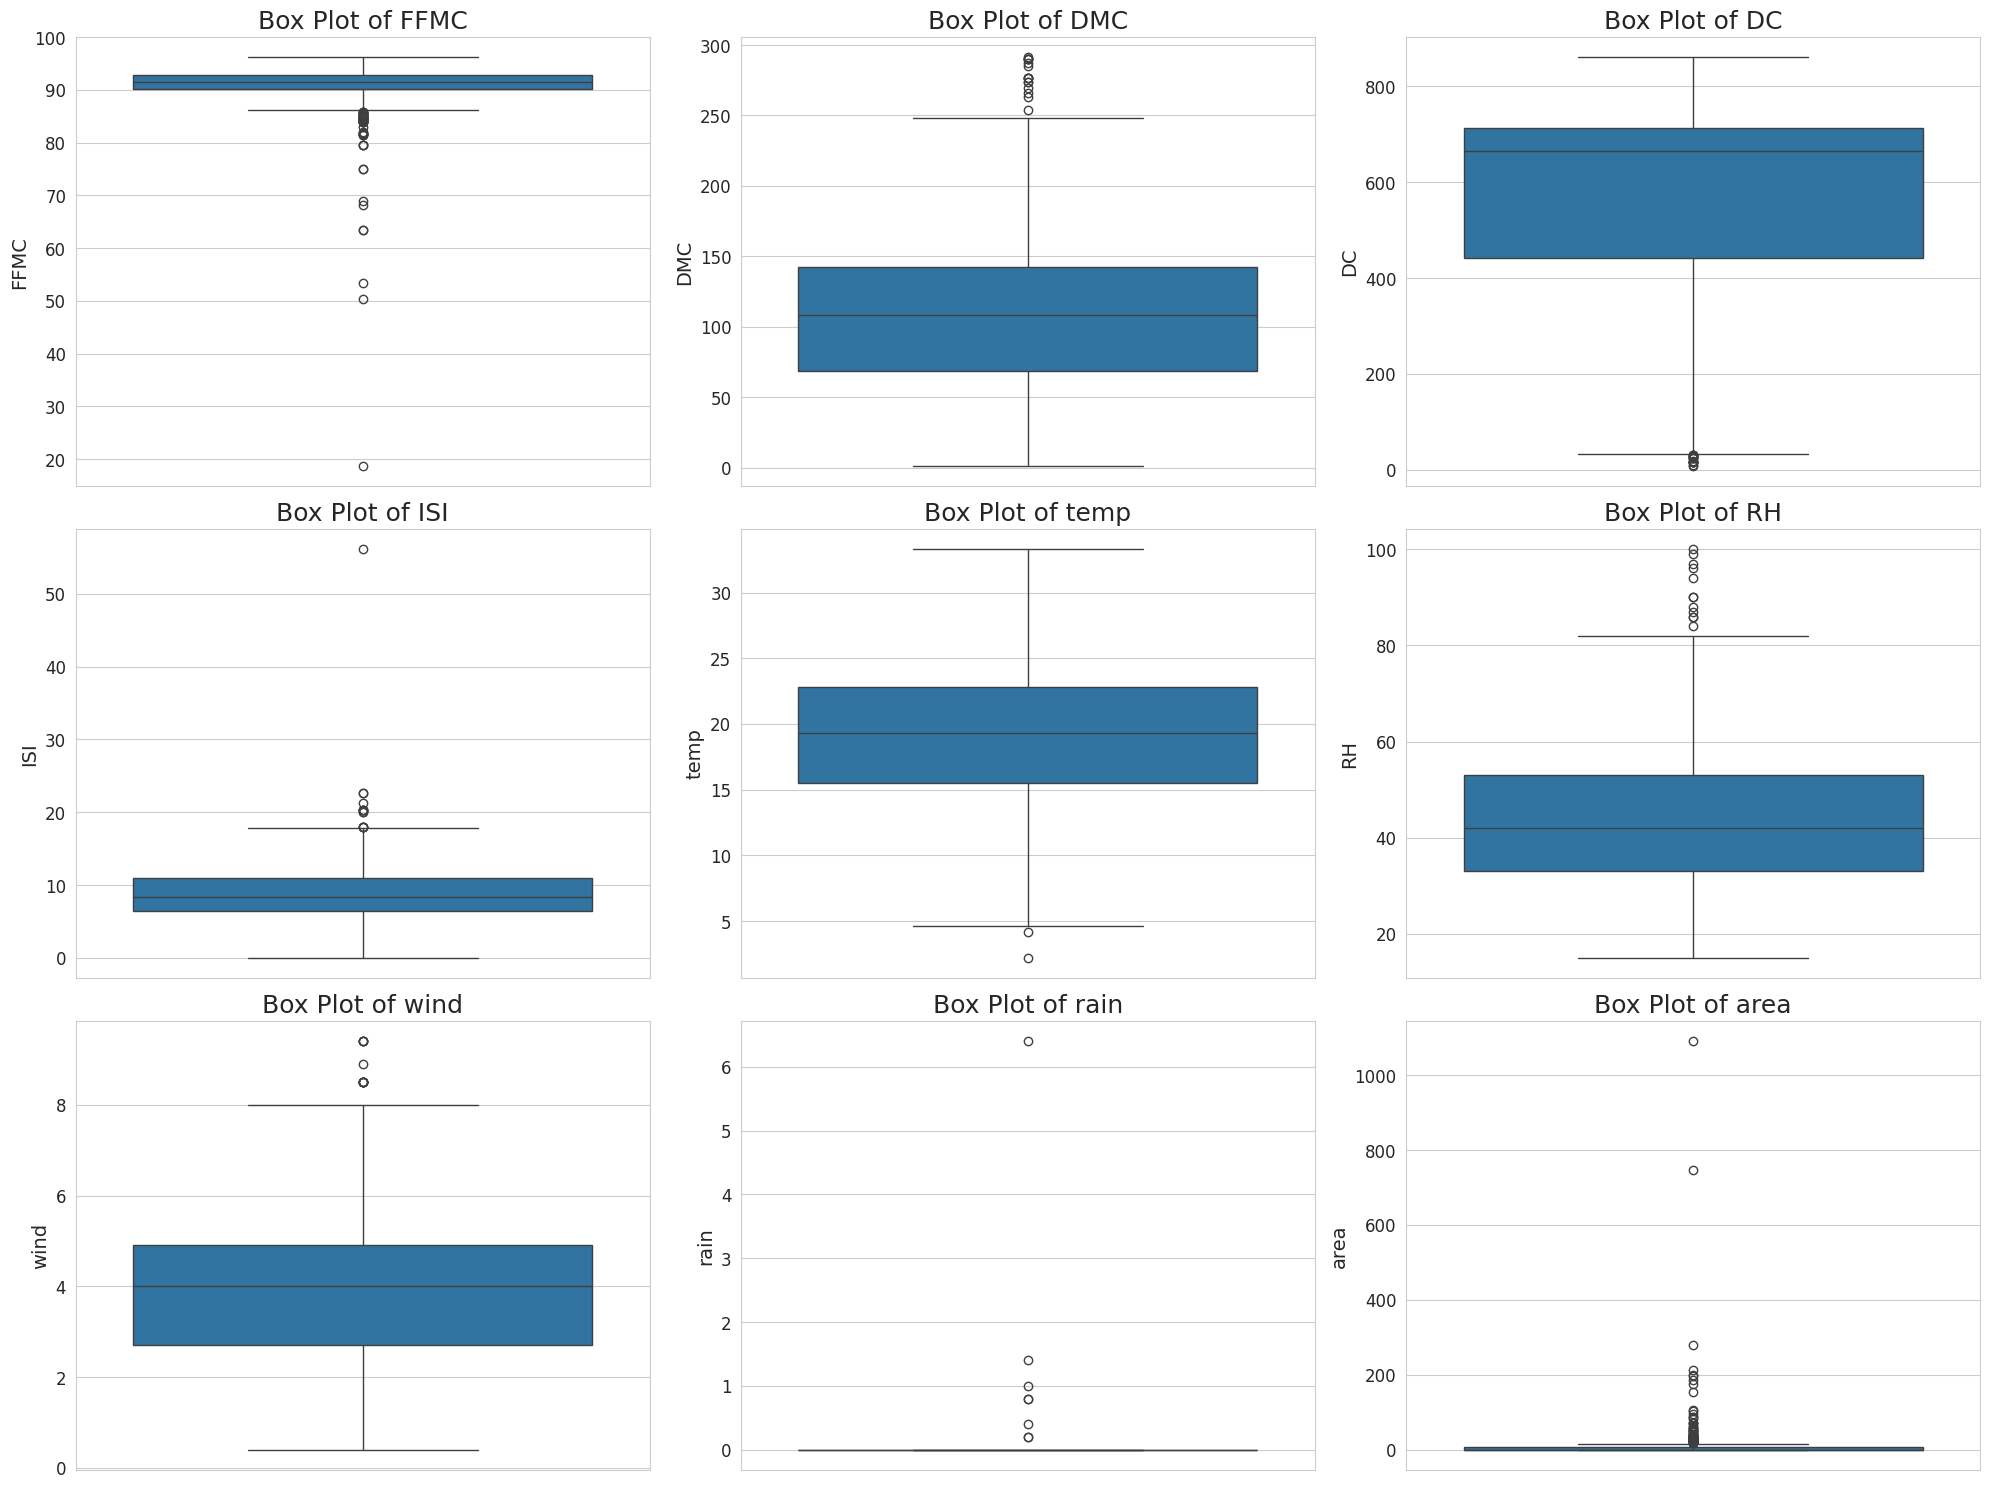

Outliers capped in 'FFMC'
Outliers capped in 'DMC'
Outliers capped in 'DC'
Outliers capped in 'ISI'
Outliers capped in 'temp'
Outliers capped in 'RH'
Outliers capped in 'wind'
Outliers capped in 'rain'
Outliers capped in 'area'


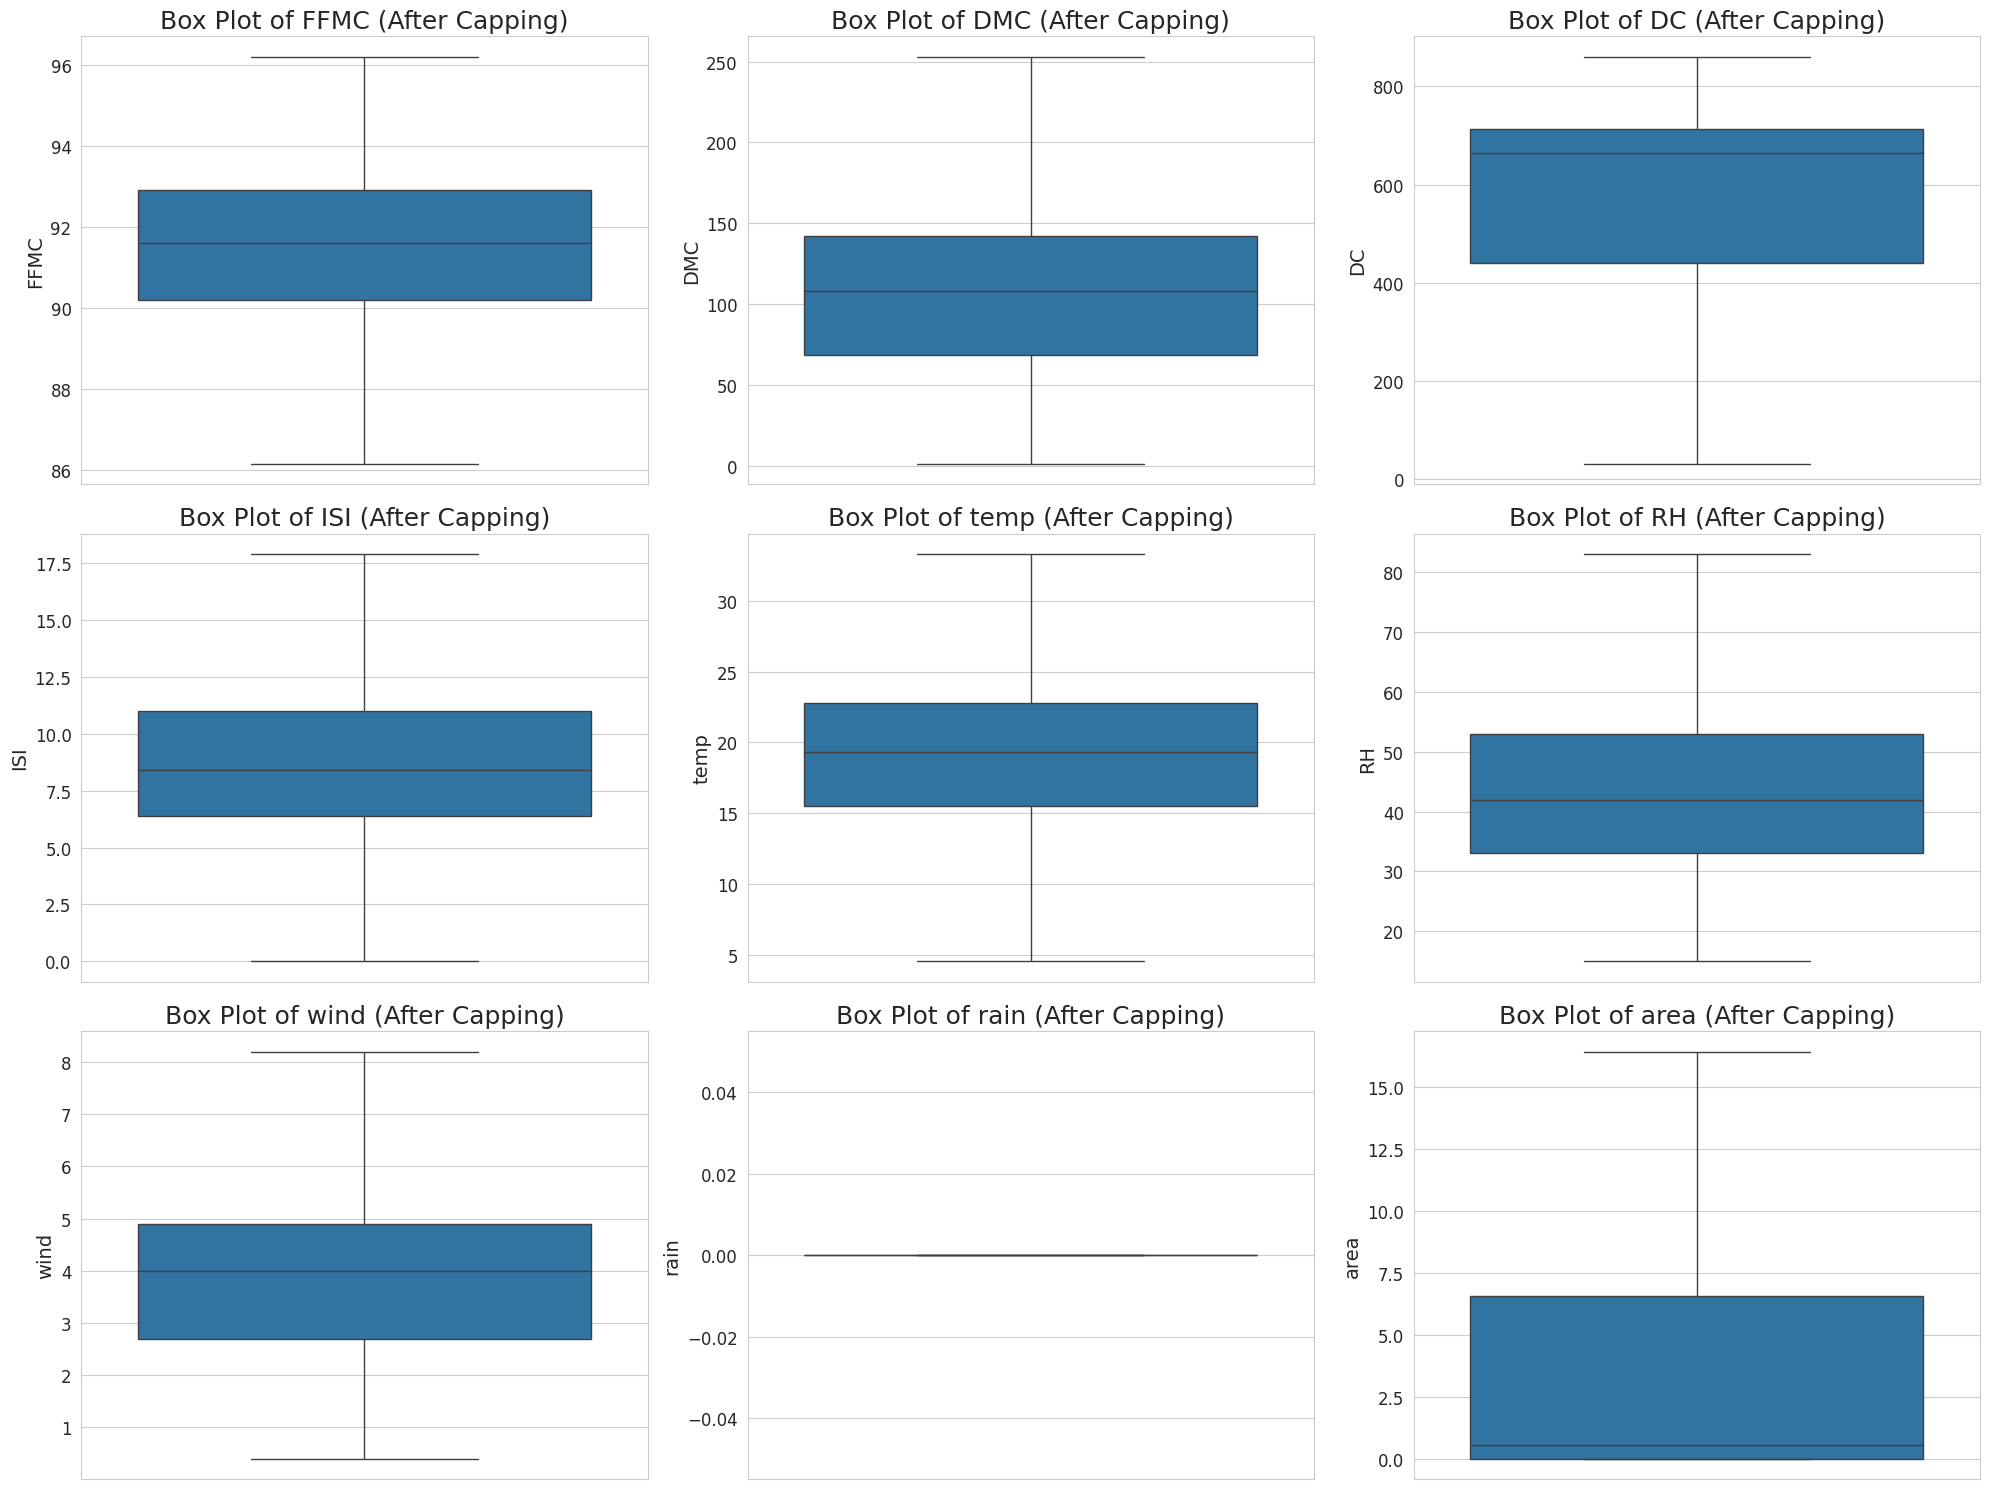

In [4]:
# Outlier detection using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

# Identify outliers in numerical columns
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
outliers_dict = {}

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outliers_dict[col] = outliers.sum()
    print(f"Number of outliers in '{col}': {outliers.sum()}")

# Visualize outliers using box plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Cap outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

for col in numerical_cols:
    cap_outliers_iqr(df, col)
    print(f"Outliers capped in '{col}'")

# Visualize box plots after capping
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} (After Capping)')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

## Univariate Analysis


Summary statistics after outlier treatment:
             FFMC         DMC          DC         ISI        temp          RH  \
count  513.000000  513.000000  513.000000  513.000000  513.000000  513.000000   
mean    91.300097  110.158480  549.481676    8.896296   18.892788   44.152047   
std      2.533121   62.116939  247.029536    3.953742    5.814190   15.811397   
min     86.150000    1.100000   31.400000    0.000000    4.550000   15.000000   
25%     90.200000   68.600000  440.900000    6.400000   15.500000   33.000000   
50%     91.600000  108.300000  664.500000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   11.000000   22.800000   53.000000   
max     96.200000  253.100000  860.600000   17.900000   33.300000   83.000000   

             wind   rain        area  
count  513.000000  513.0  513.000000  
mean     3.995127    0.0    4.048694  
std      1.756327    0.0    5.806490  
min      0.400000    0.0    0.000000  
25%      2.700000    0.0    0.

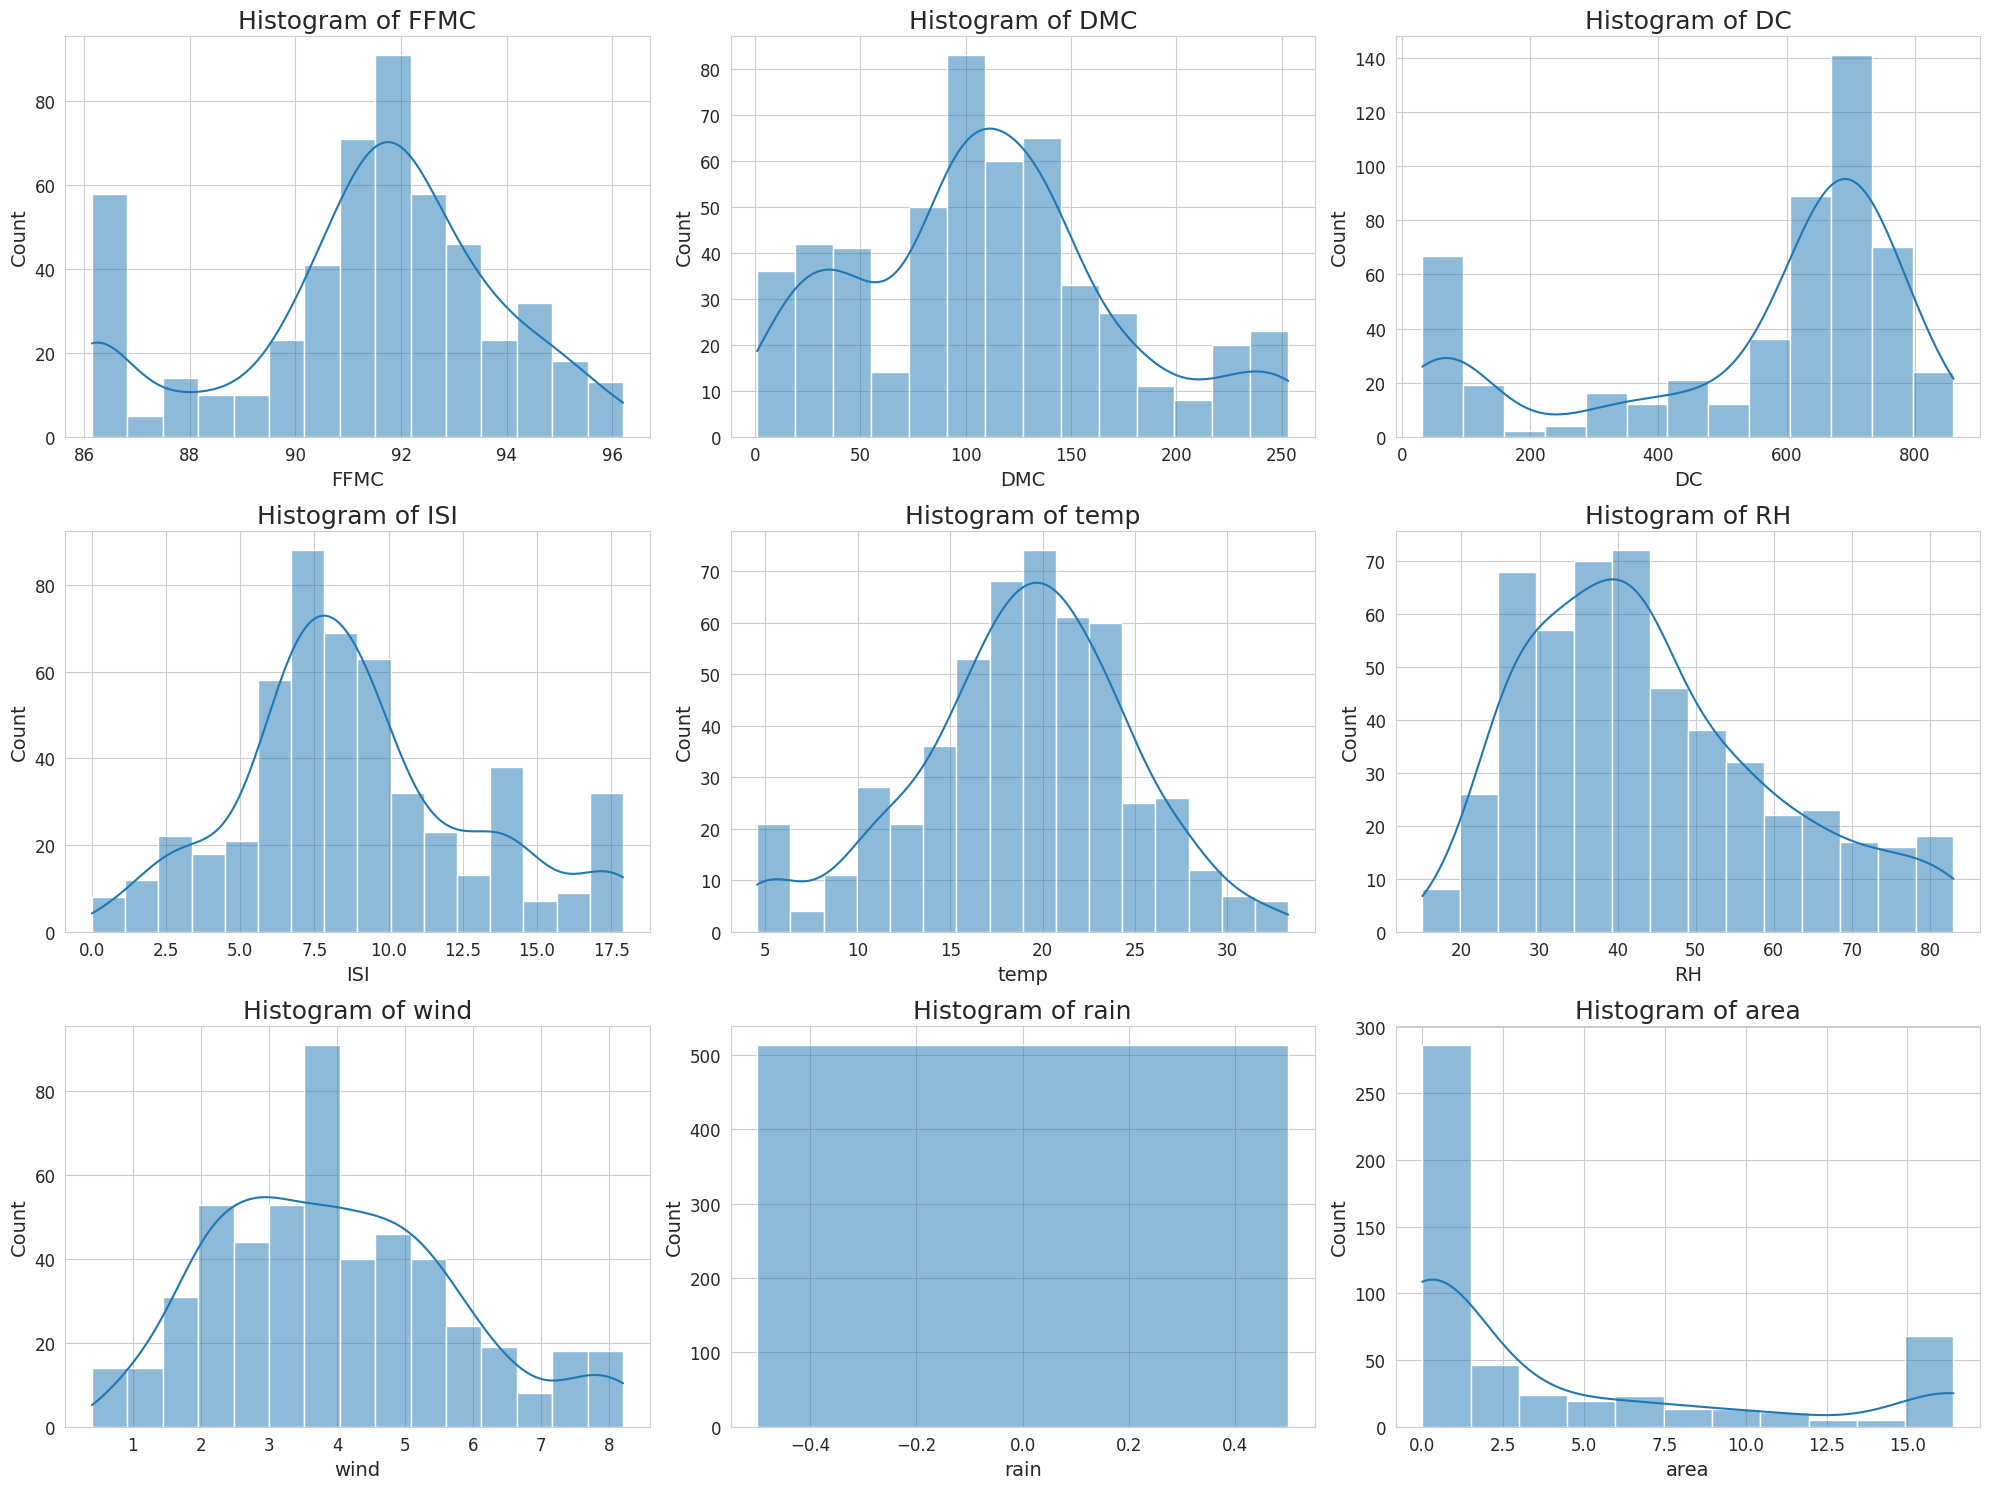

In [5]:
# Summary statistics for numerical variables
print("\nSummary statistics after outlier treatment:")
print(df[numerical_cols].describe())

# Frequency distributions for categorical variables
categorical_cols = ['month', 'day', 'X', 'Y']
for col in categorical_cols:
    print(f"\nFrequency distribution for '{col}':")
    print(df[col].value_counts())

# Histograms for numerical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis


Correlation matrix:
          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.535281  0.469555  0.791616  0.631646 -0.283632 -0.085276   
DMC   0.535281  1.000000  0.688510  0.371609  0.490352  0.069851 -0.107821   
DC    0.469555  0.688510  1.000000  0.285398  0.497281 -0.031736 -0.196824   
ISI   0.791616  0.371609  0.285398  1.000000  0.442971 -0.156327  0.113505   
temp  0.631646  0.490352  0.497281  0.442971  1.000000 -0.526297 -0.224435   
RH   -0.283632  0.069851 -0.031736 -0.156327 -0.526297  1.000000  0.082034   
wind -0.085276 -0.107821 -0.196824  0.113505 -0.224435  0.082034  1.000000   
rain       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
area -0.001109  0.048244  0.054669 -0.003200  0.015922 -0.039634  0.077593   

      rain      area  
FFMC   NaN -0.001109  
DMC    NaN  0.048244  
DC     NaN  0.054669  
ISI    NaN -0.003200  
temp   NaN  0.015922  
RH     NaN -0.039634  
wind   NaN  0.077593  
rain   NaN    

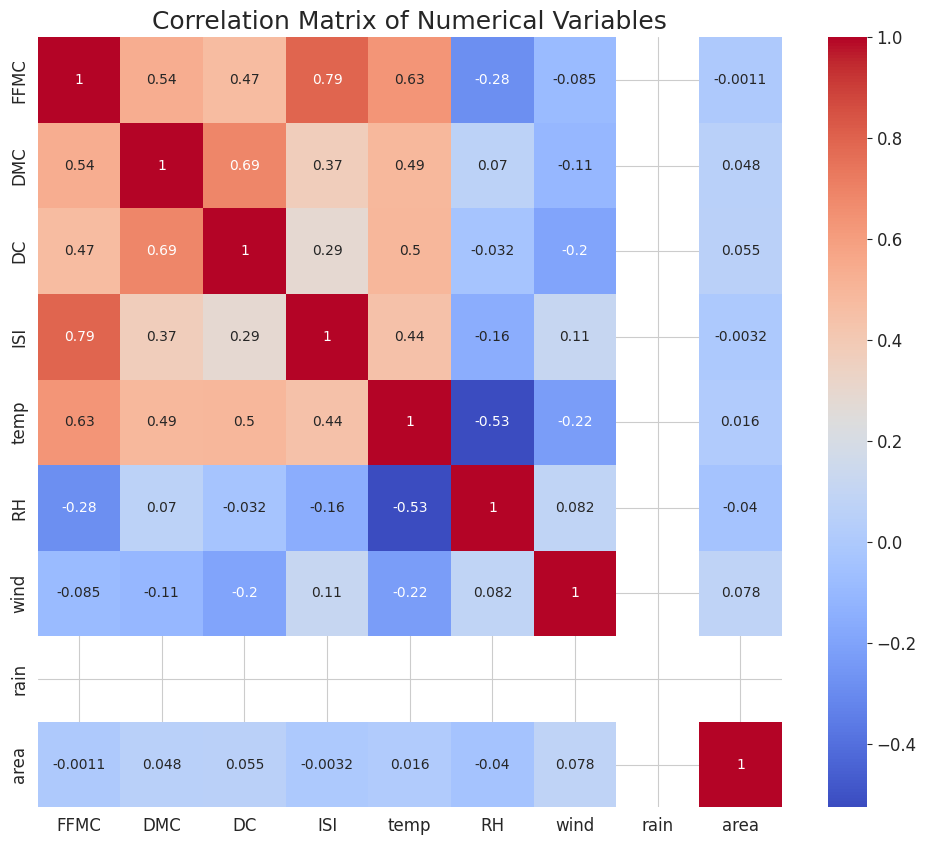

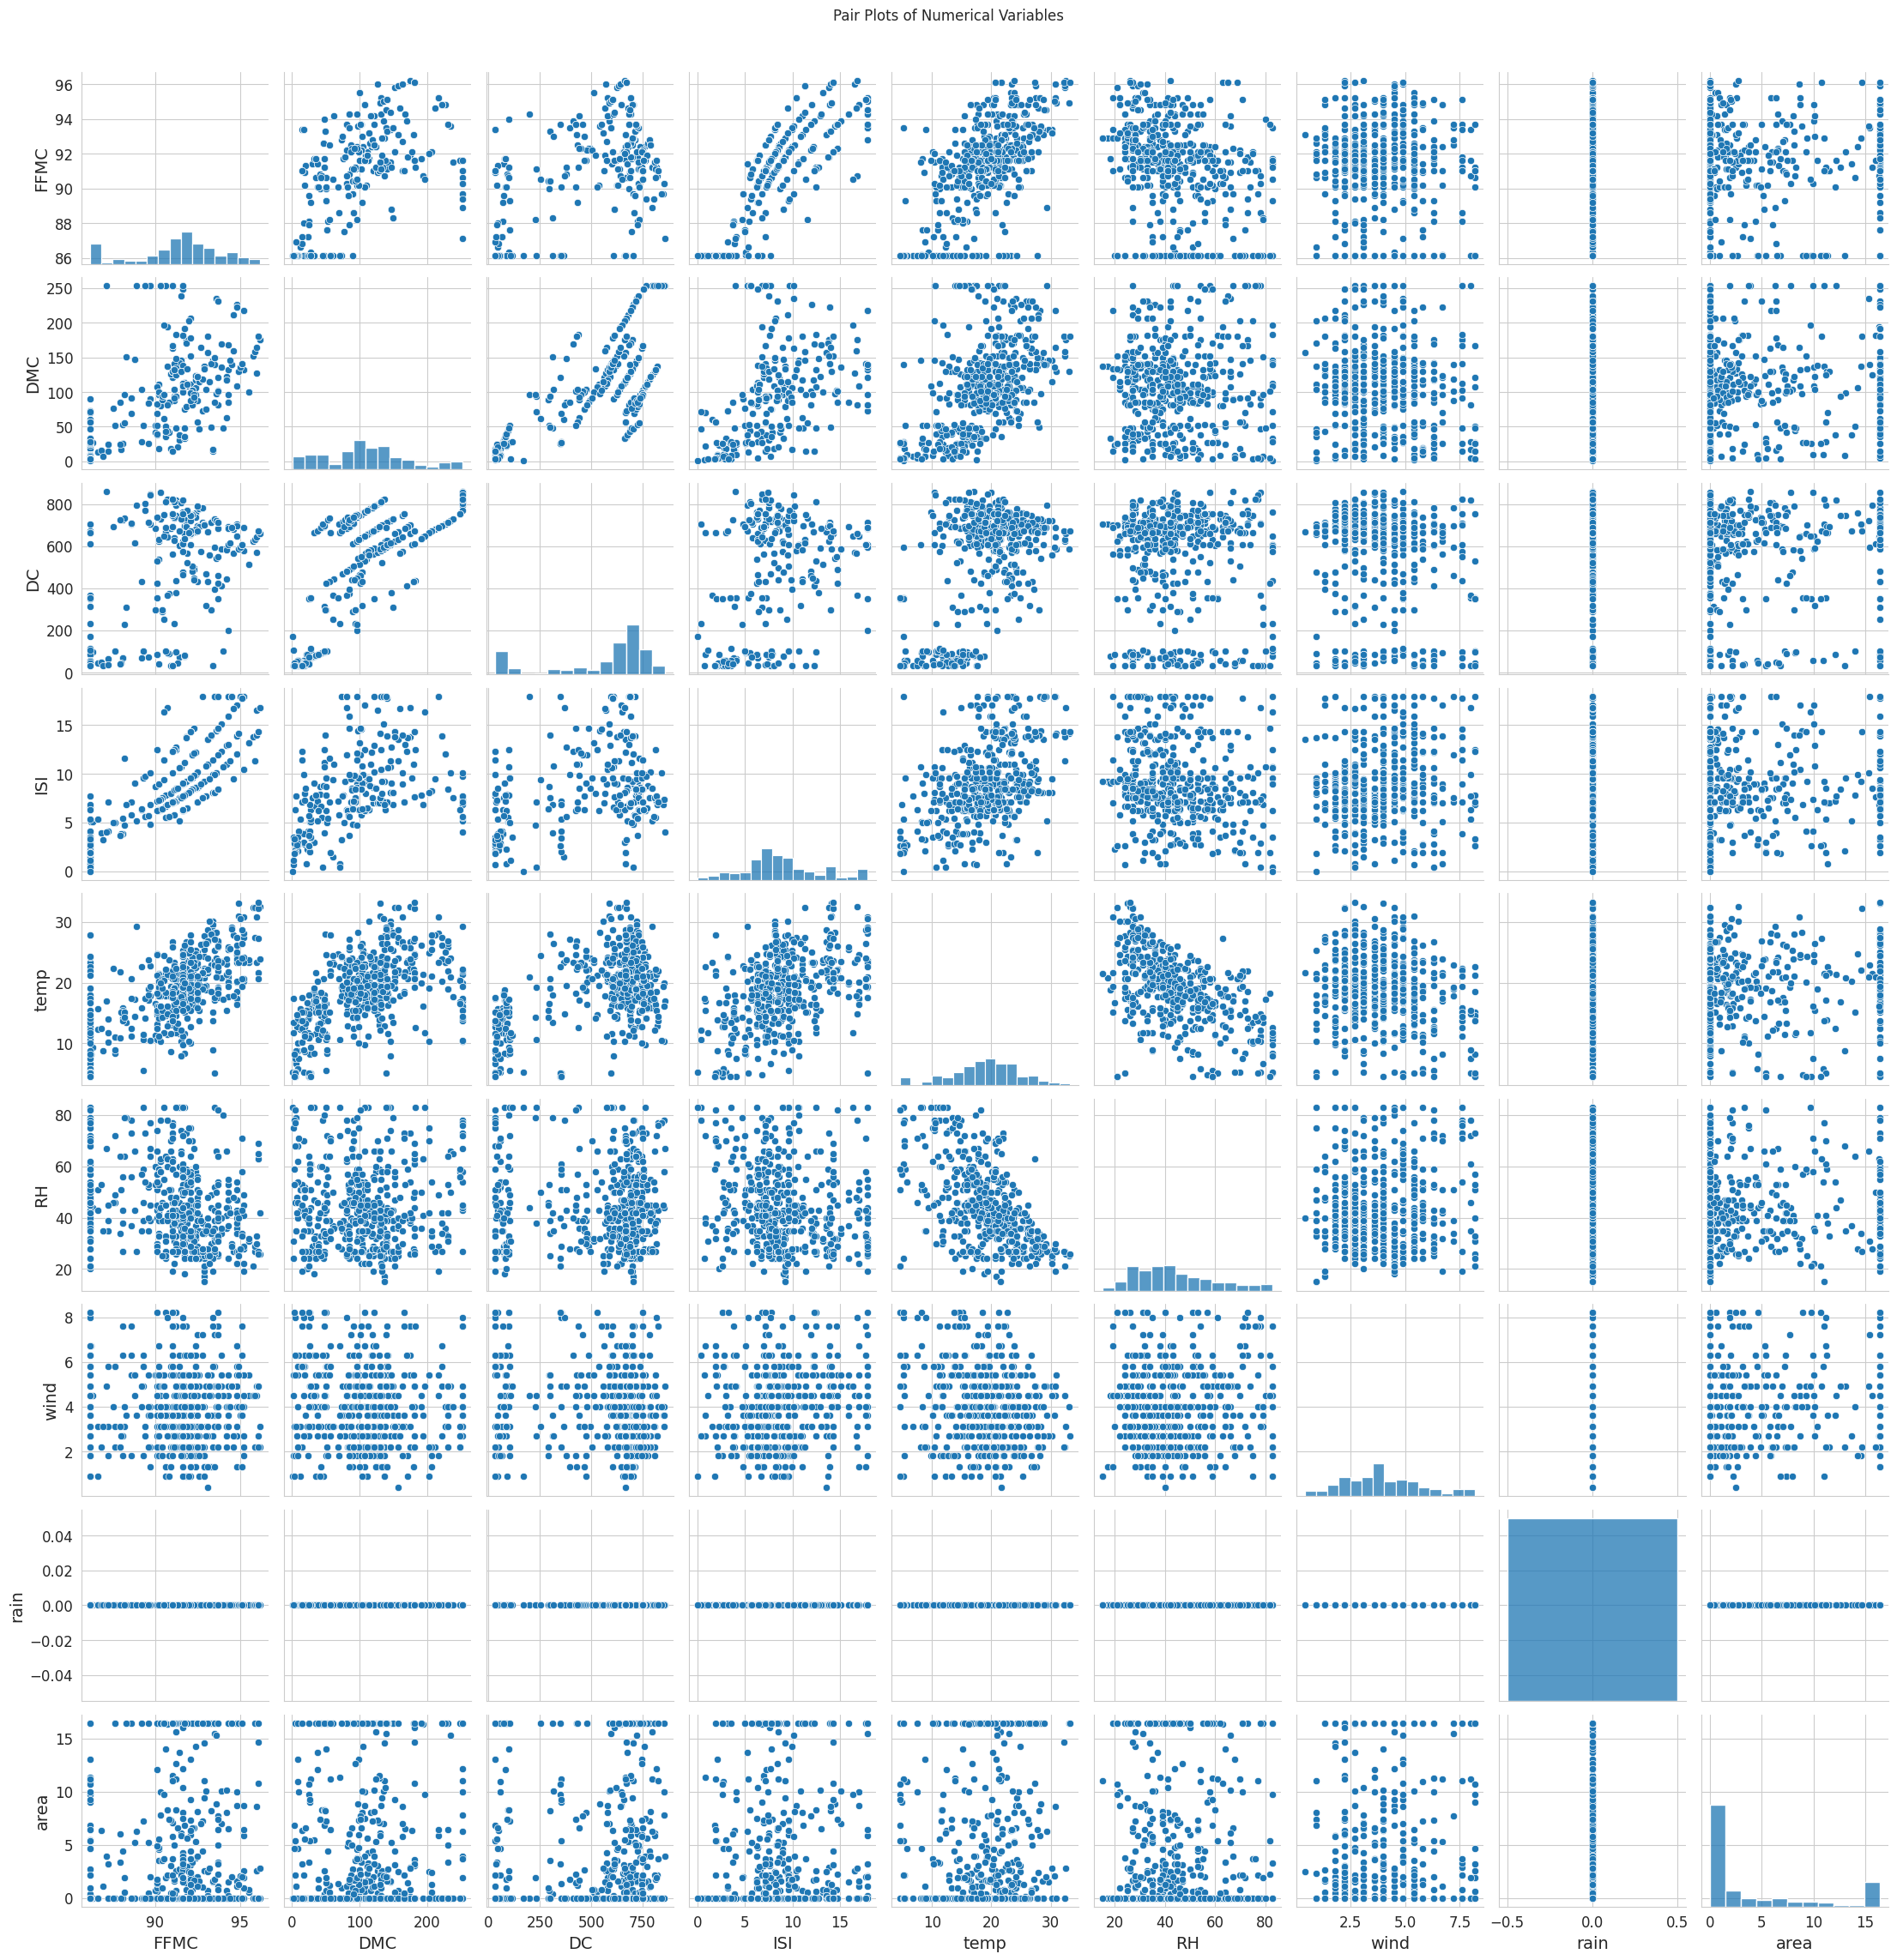

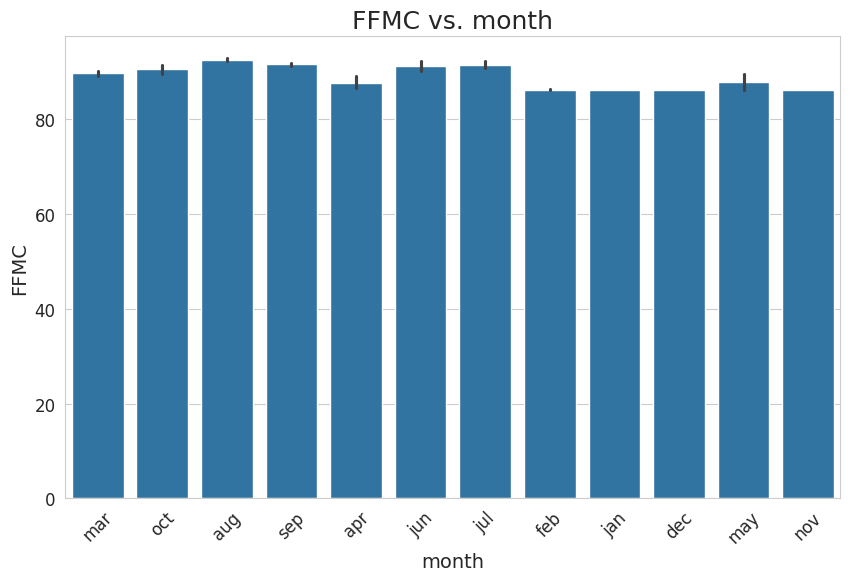

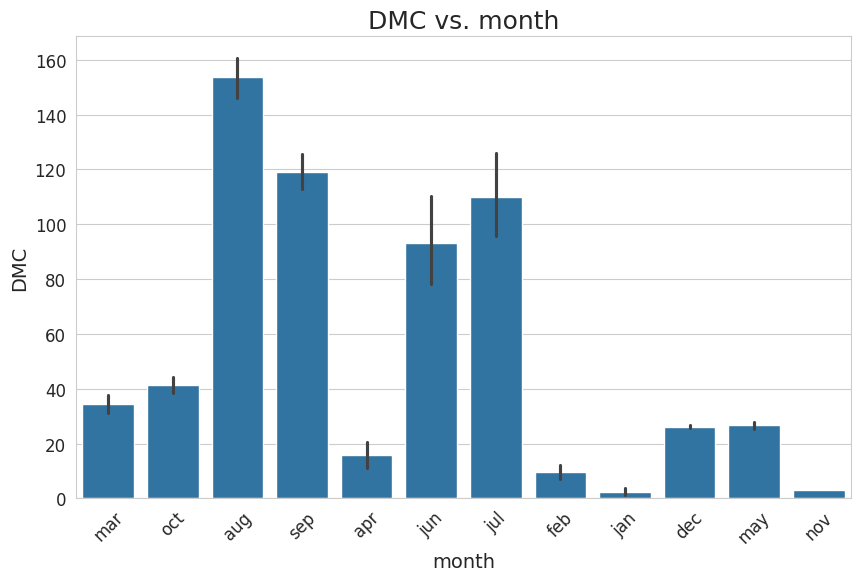

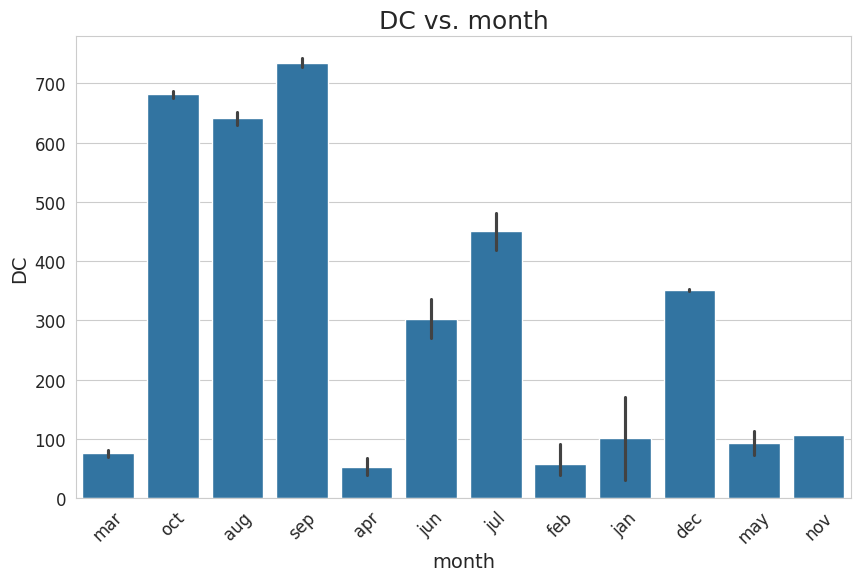

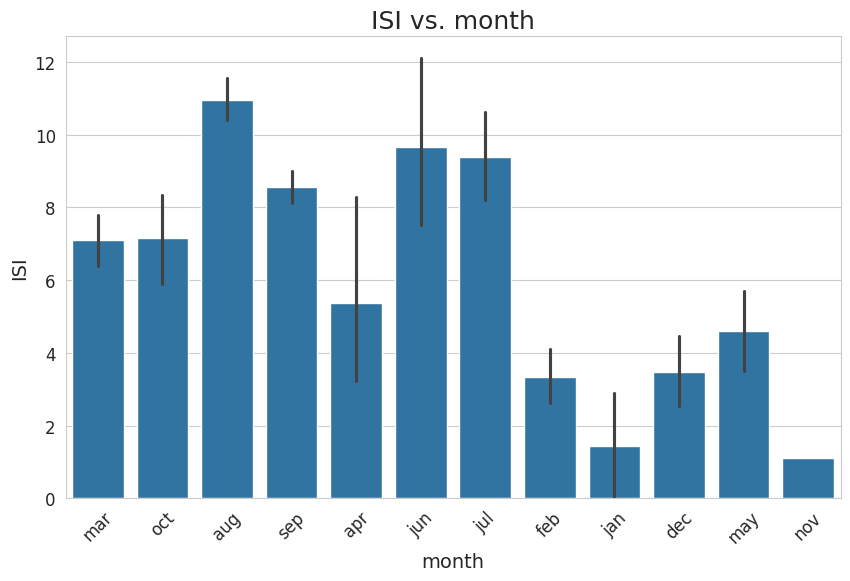

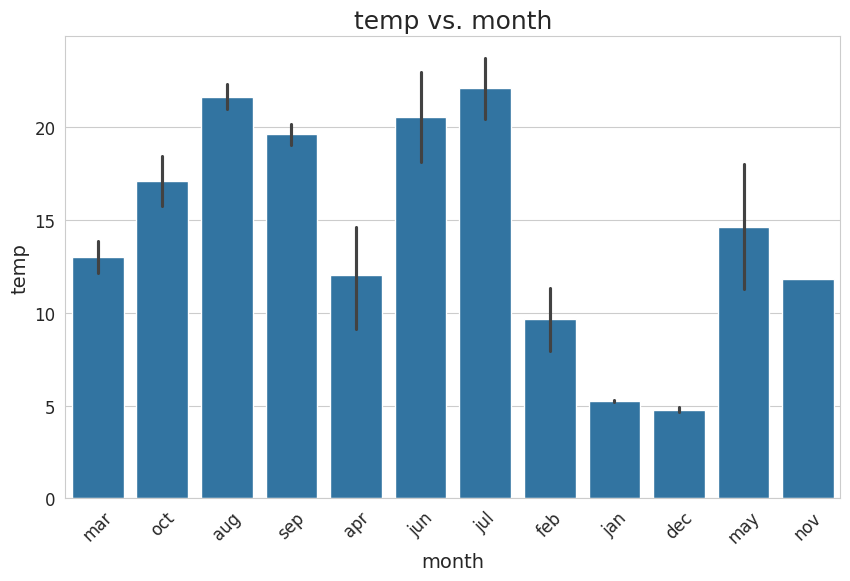

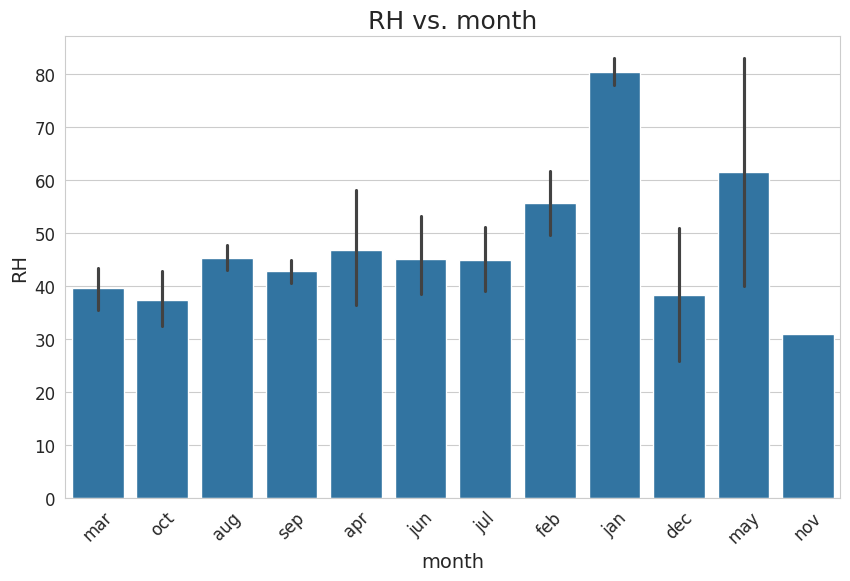

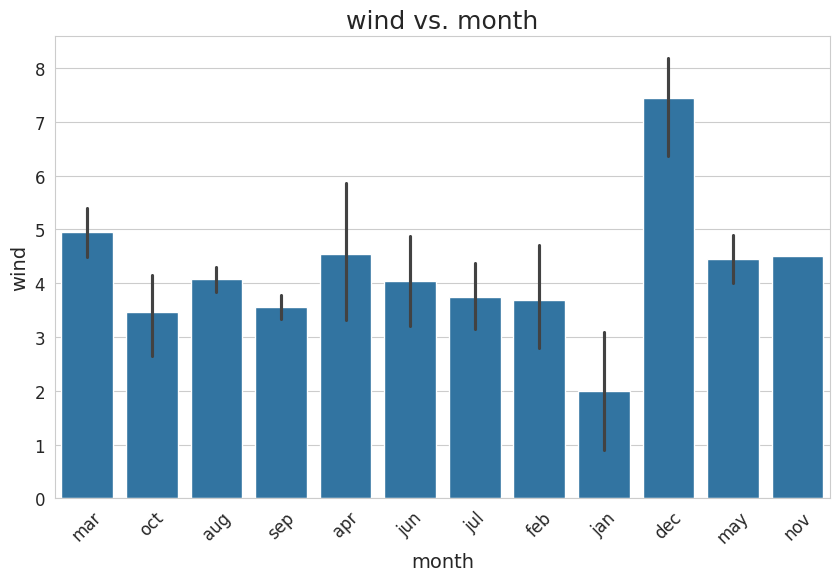

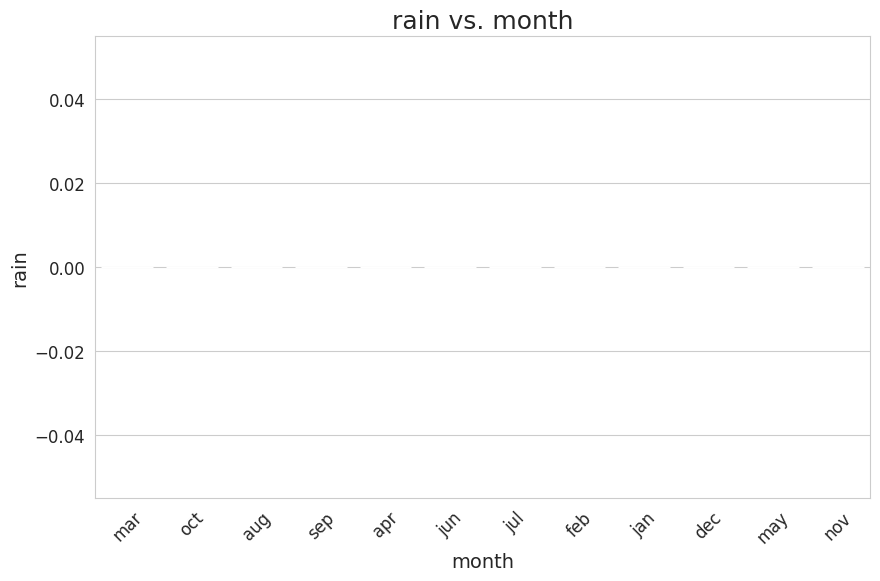

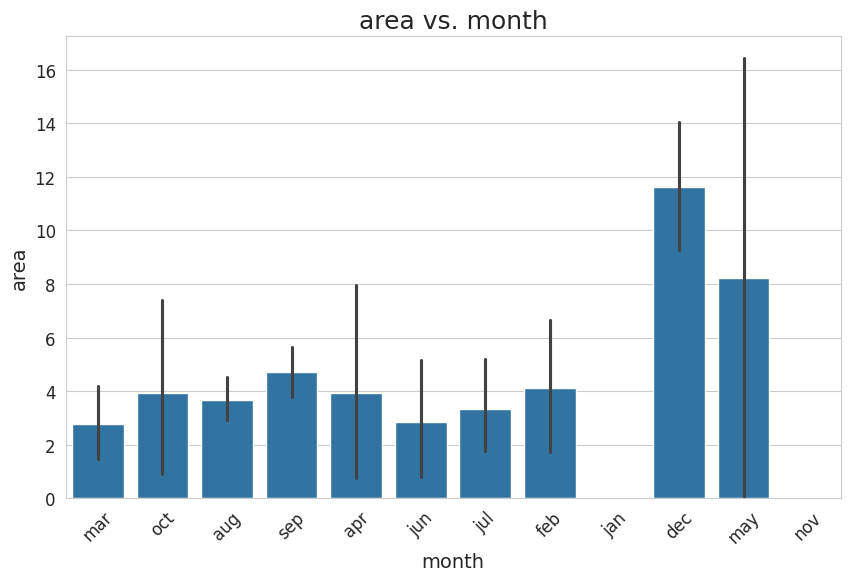

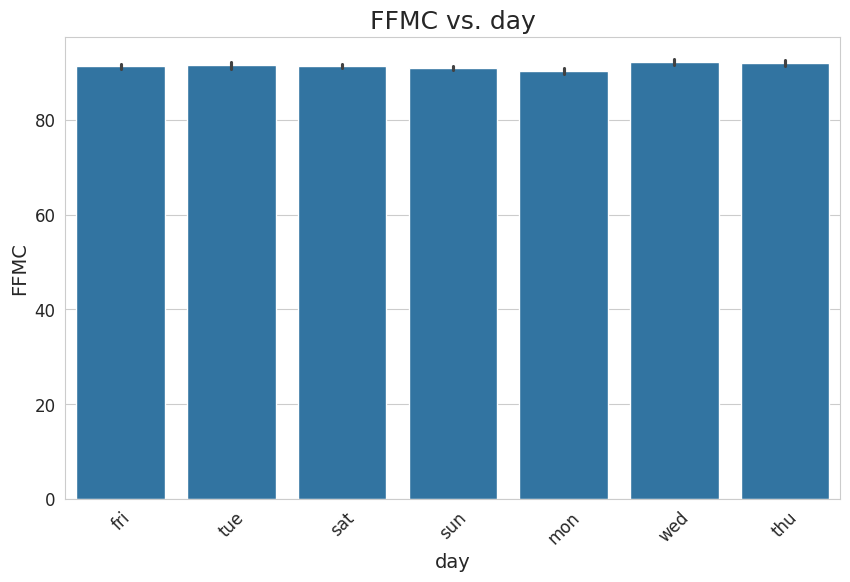

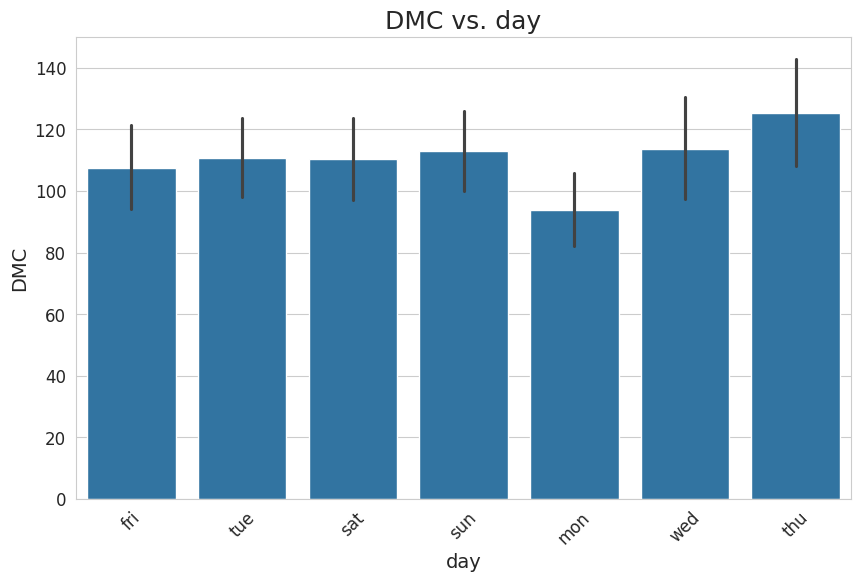

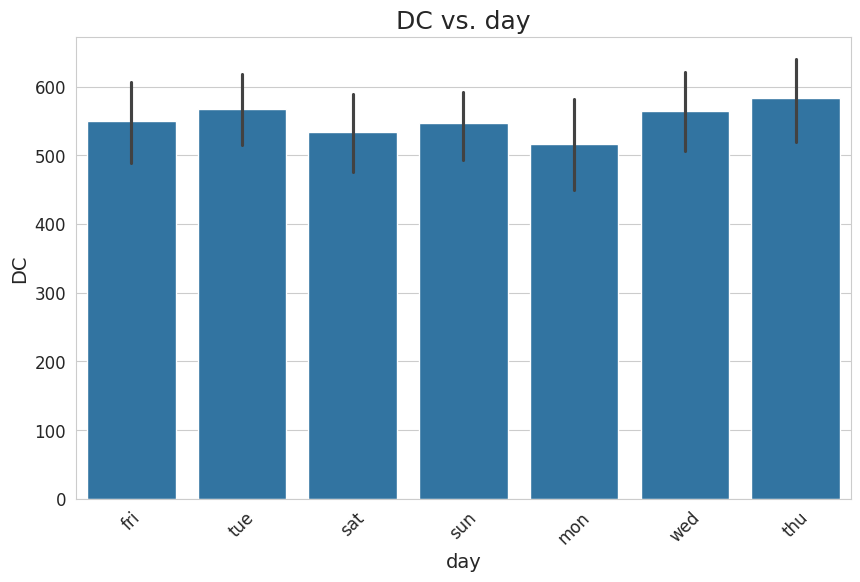

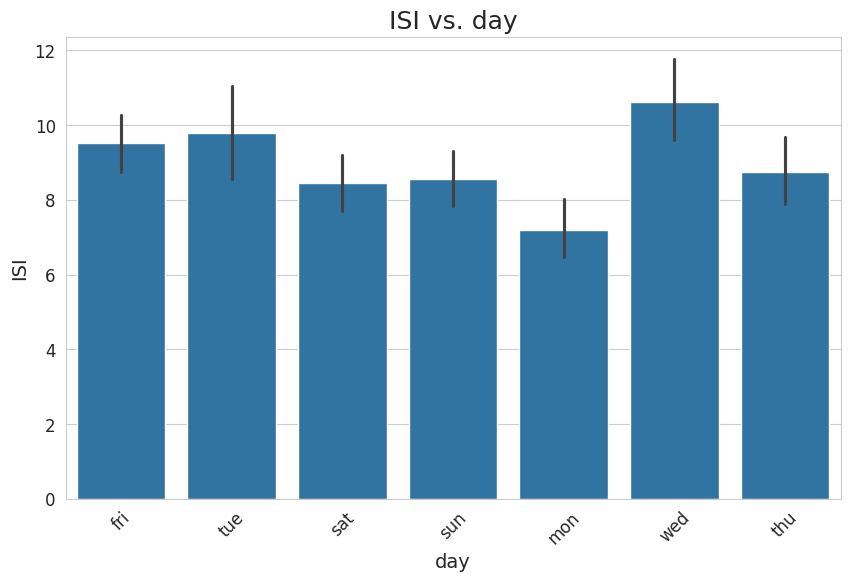

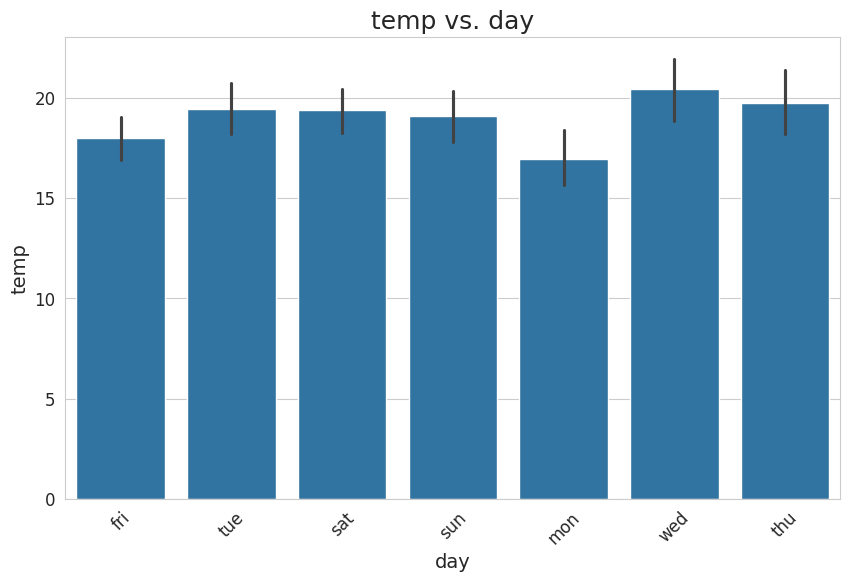

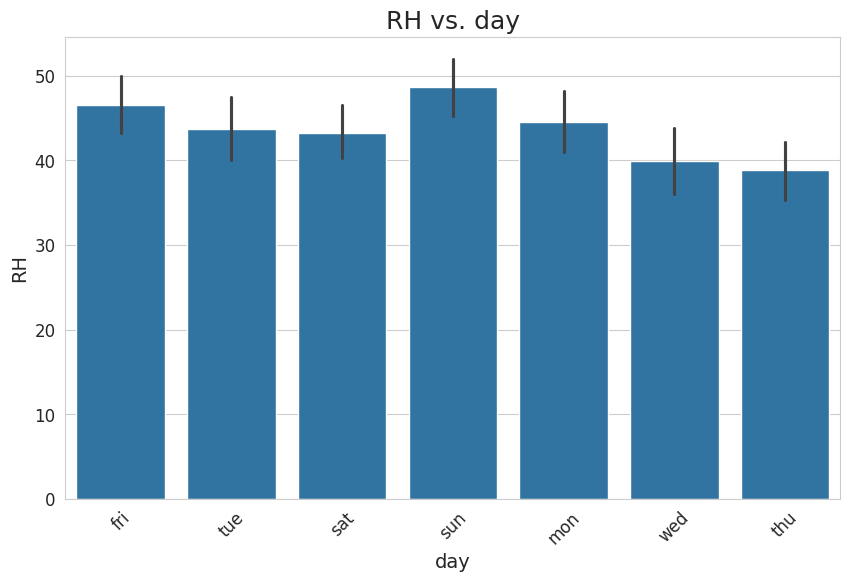

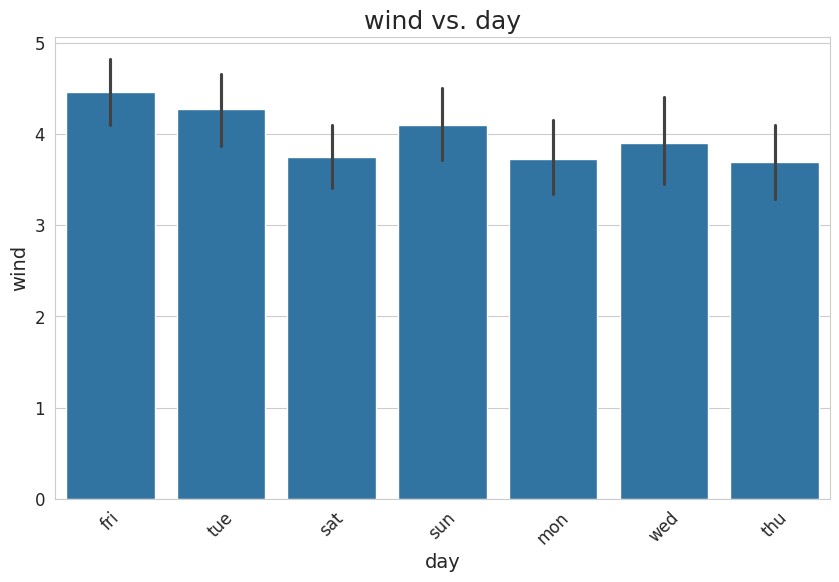

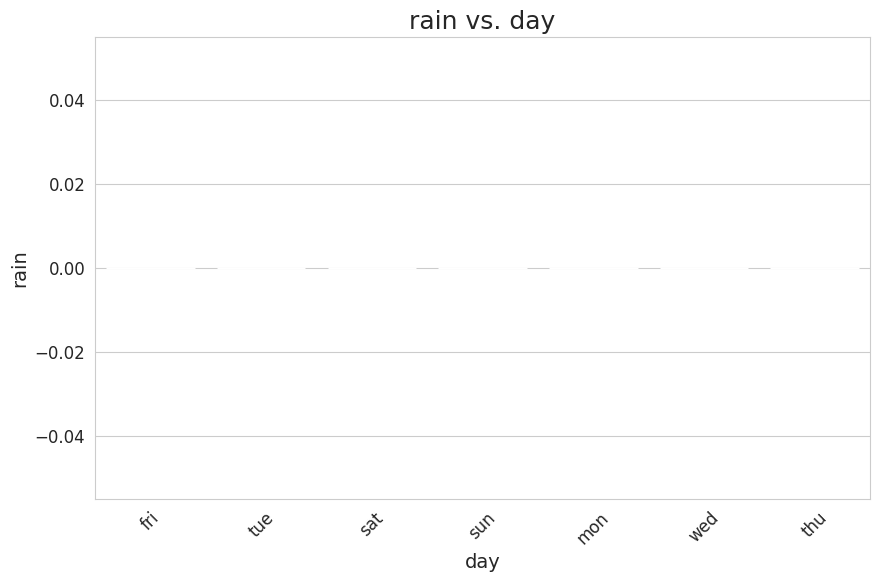

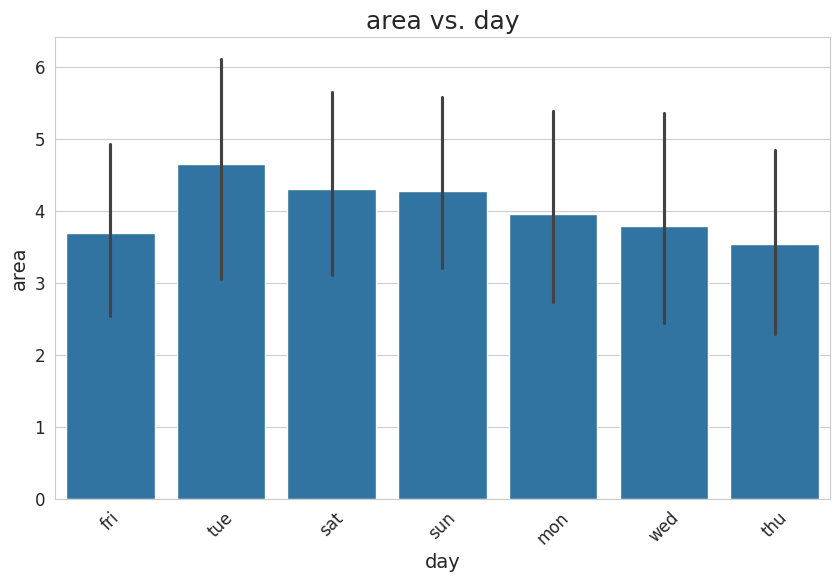

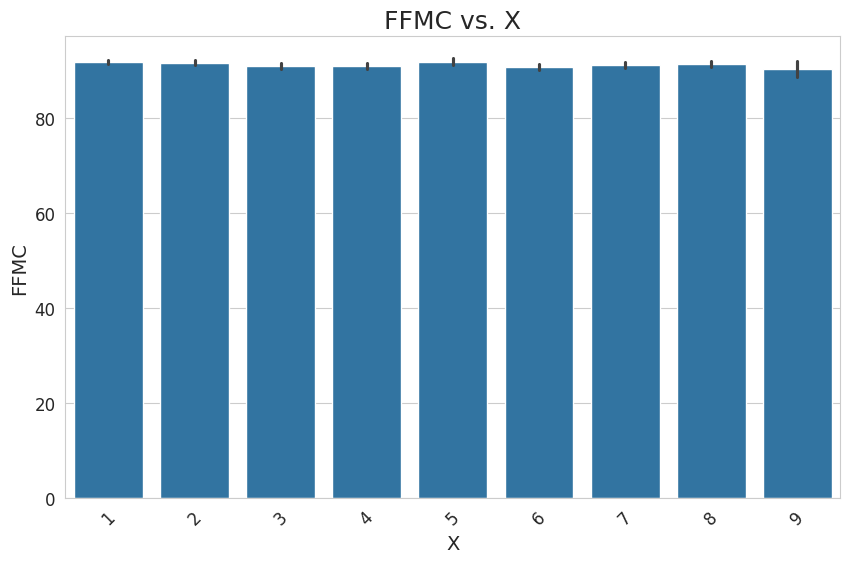

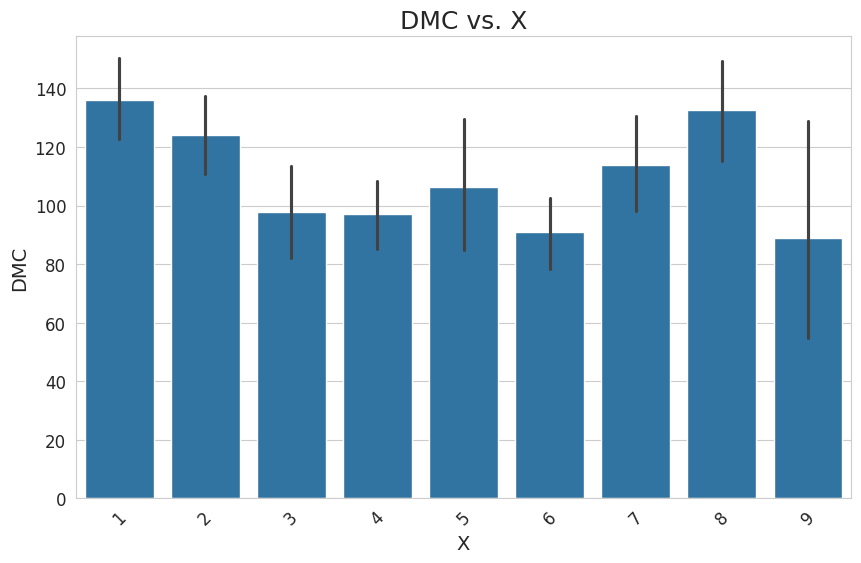

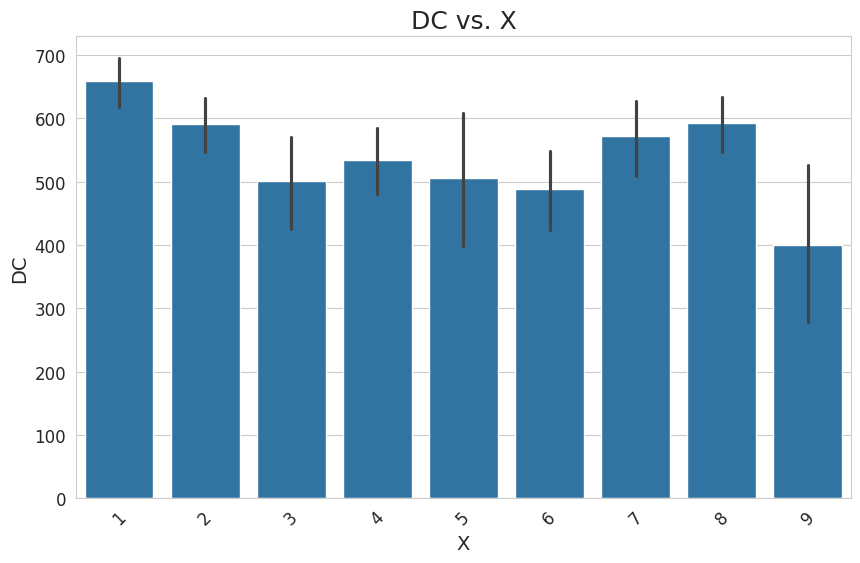

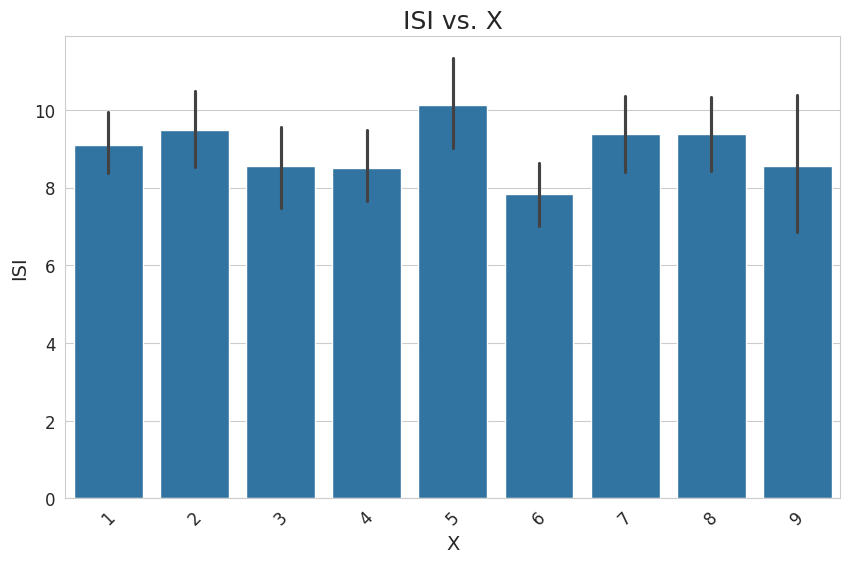

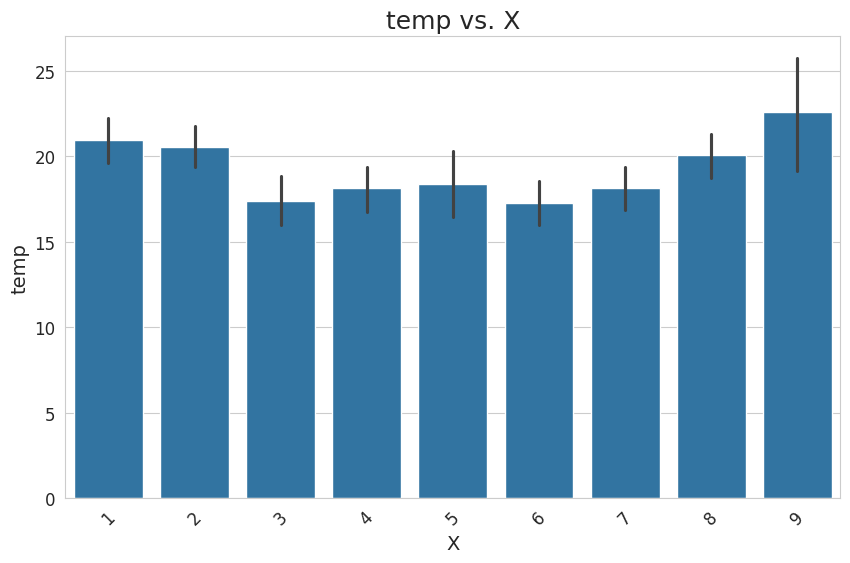

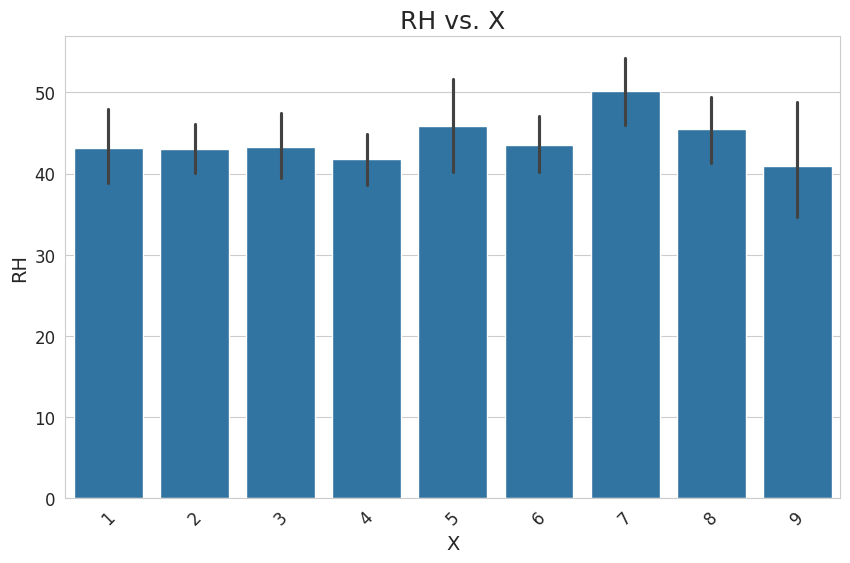

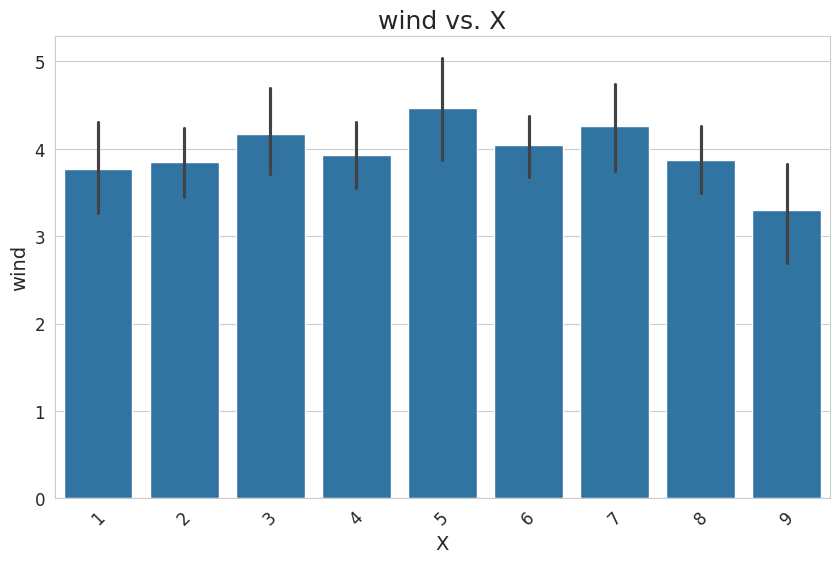

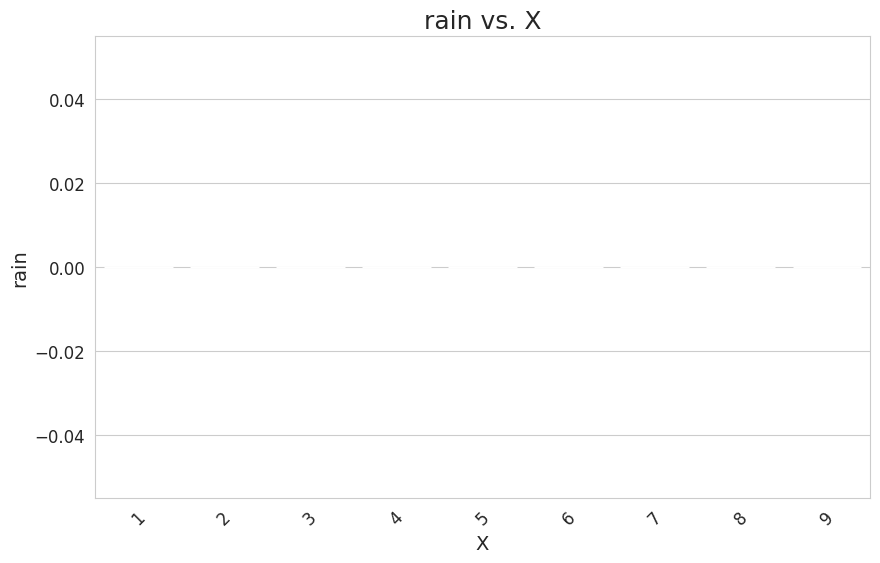

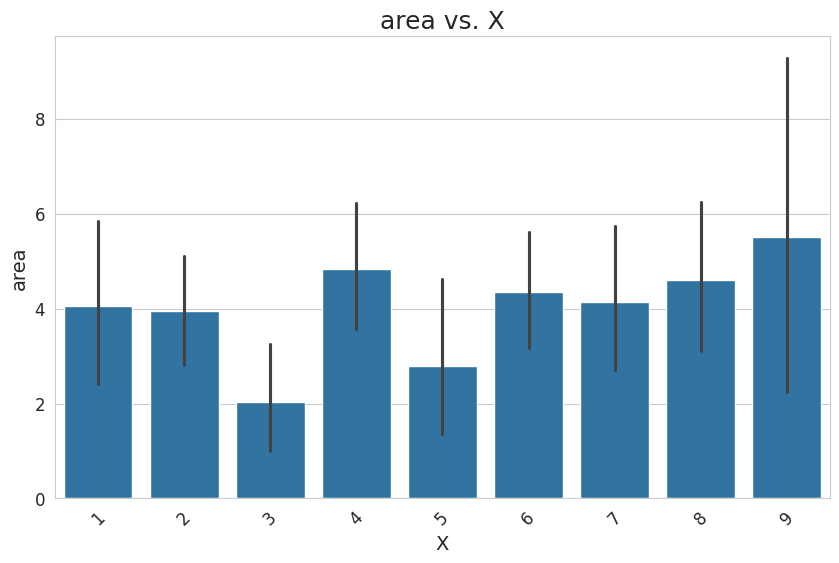

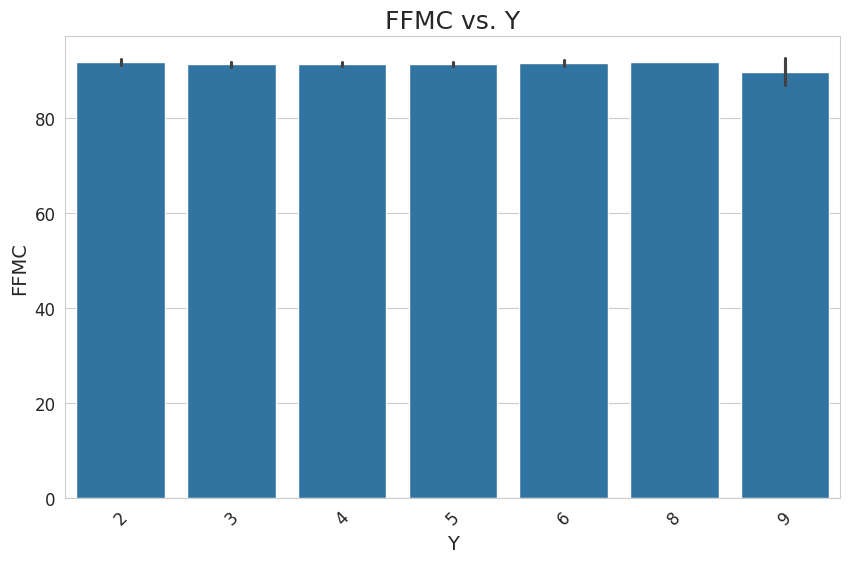

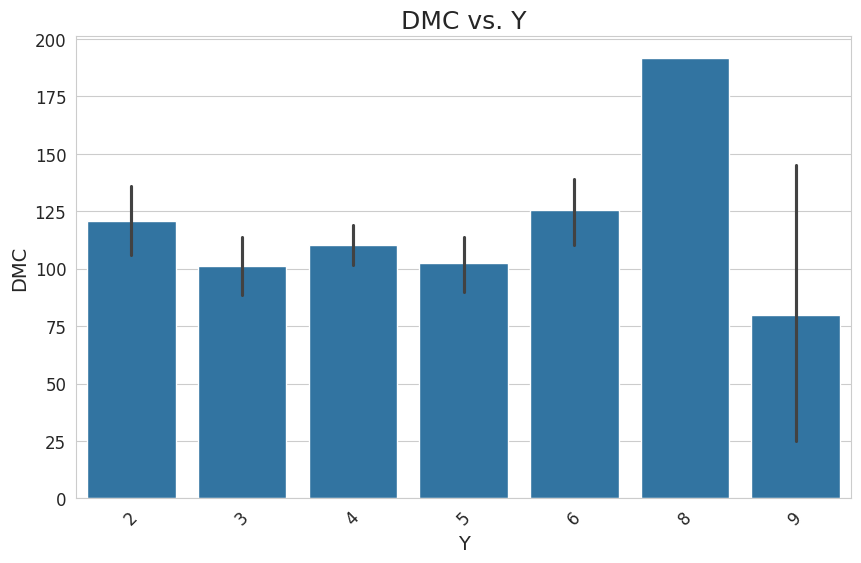

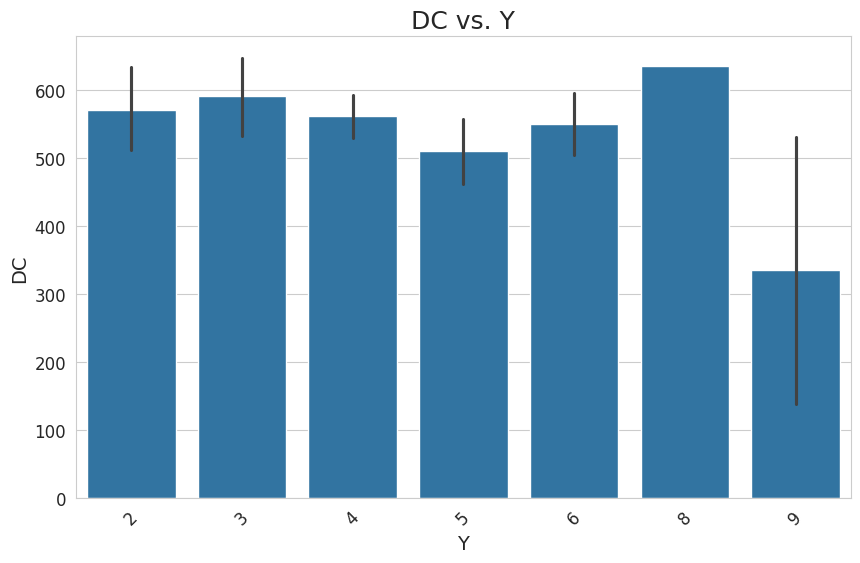

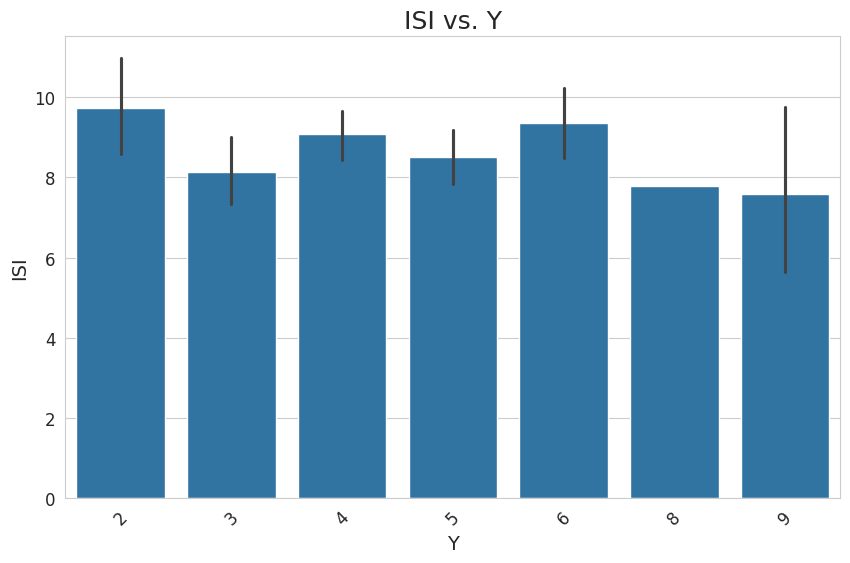

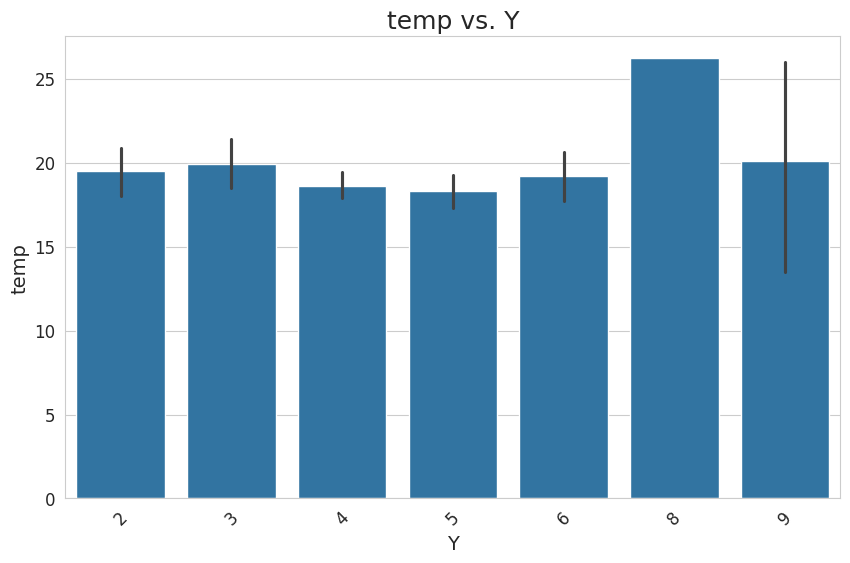

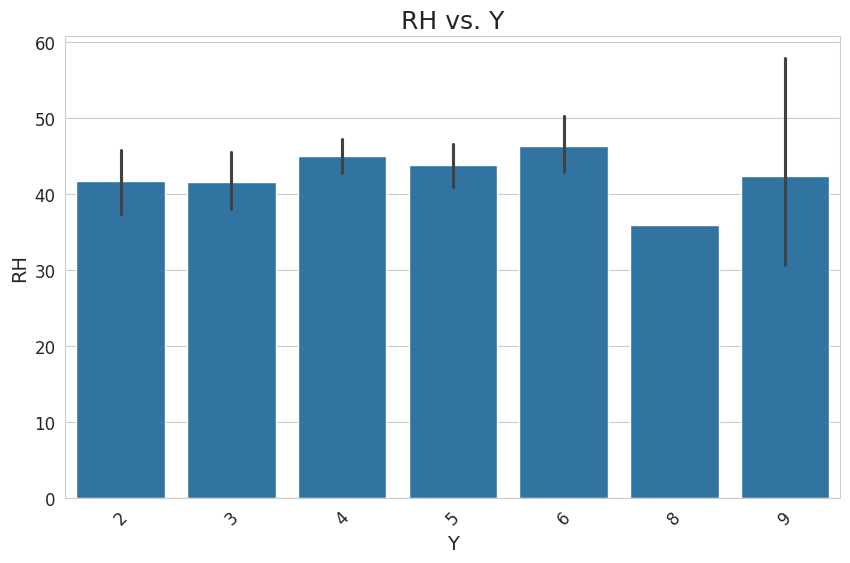

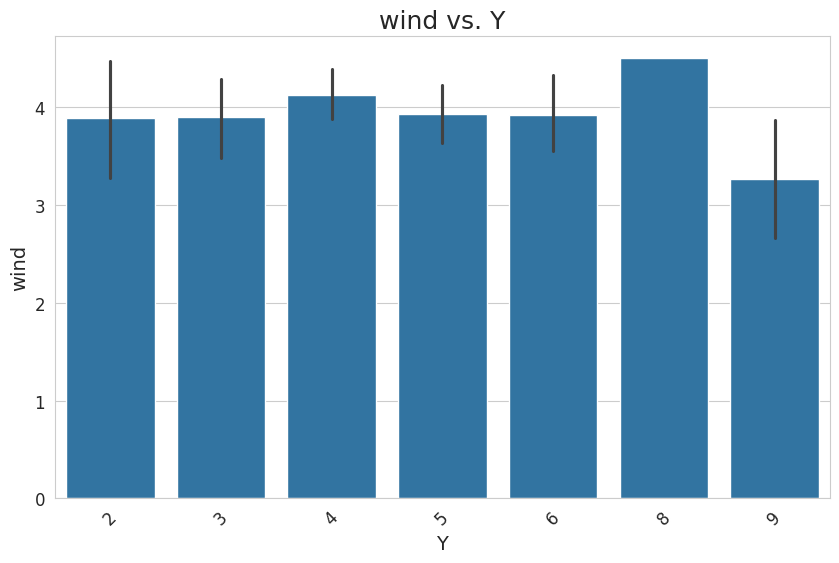

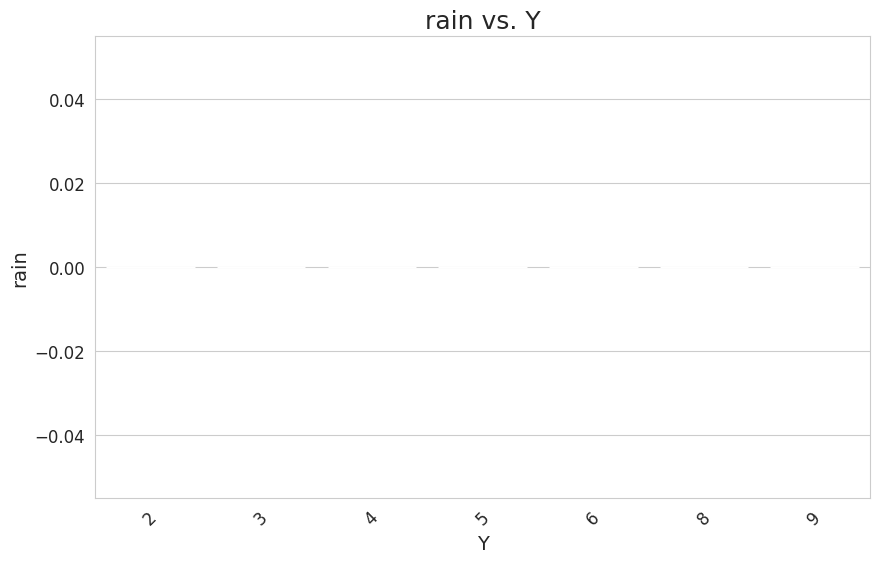

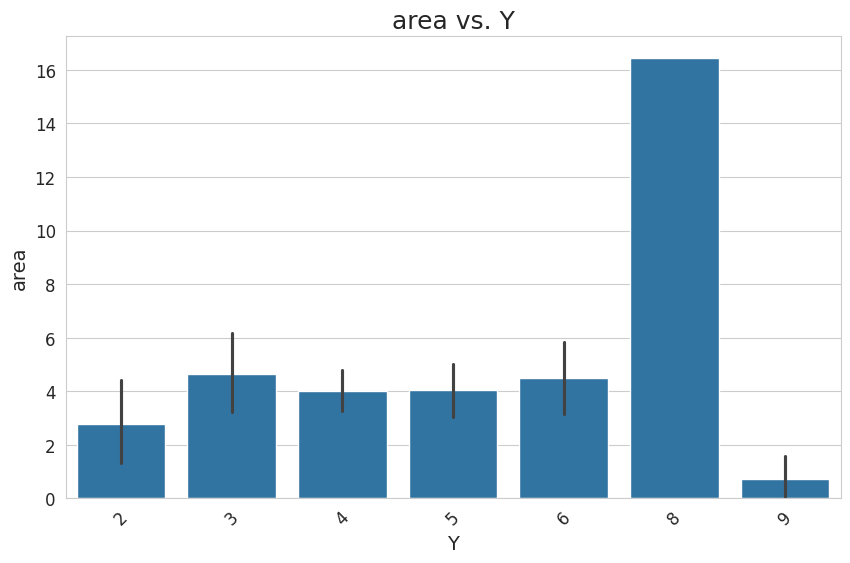

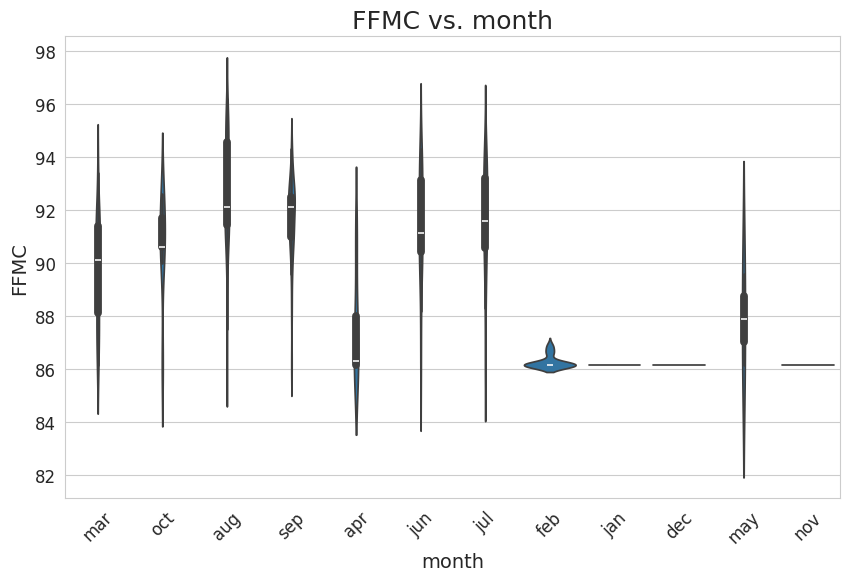

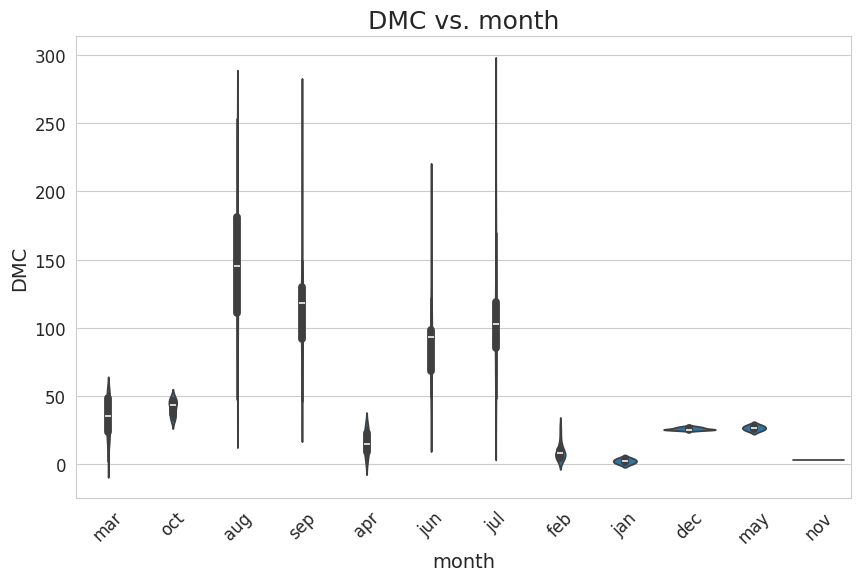

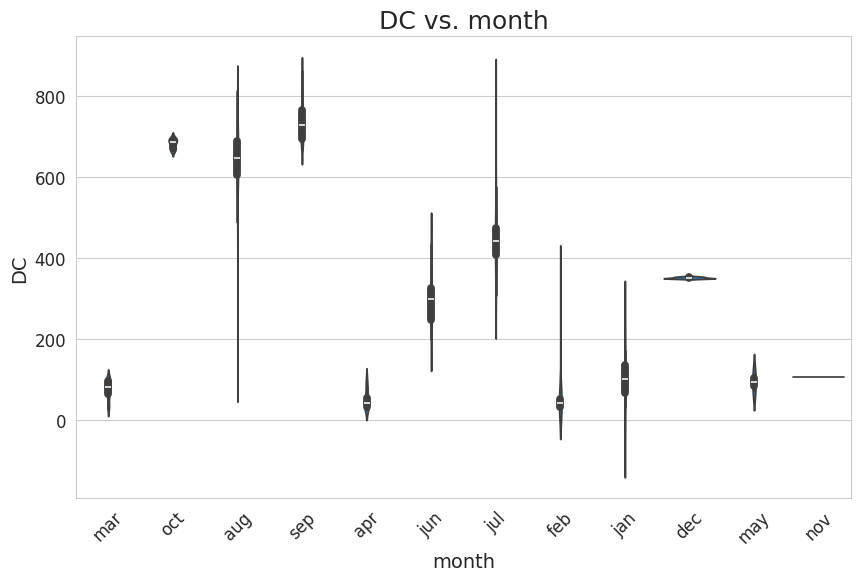

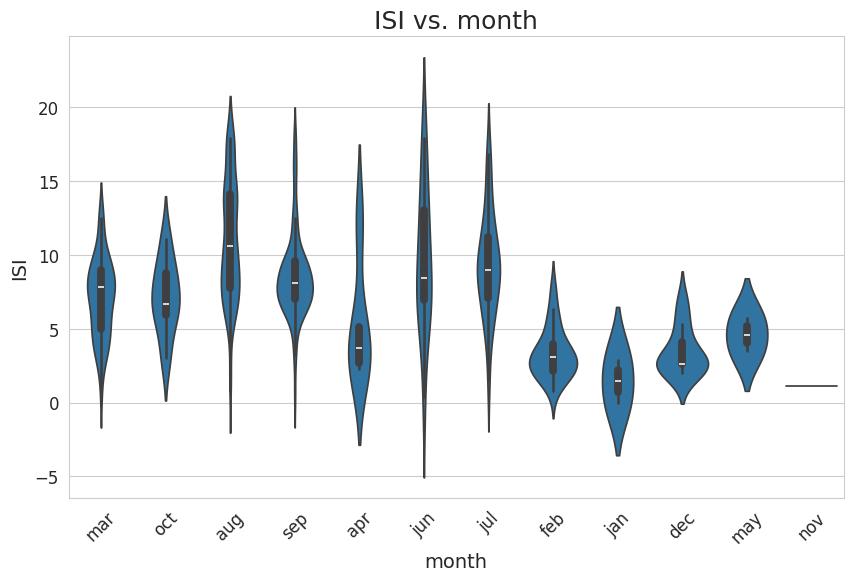

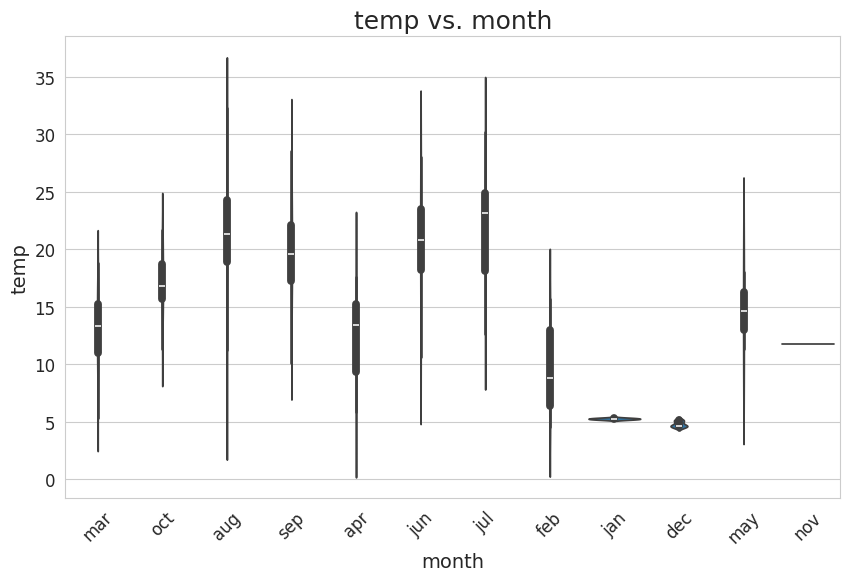

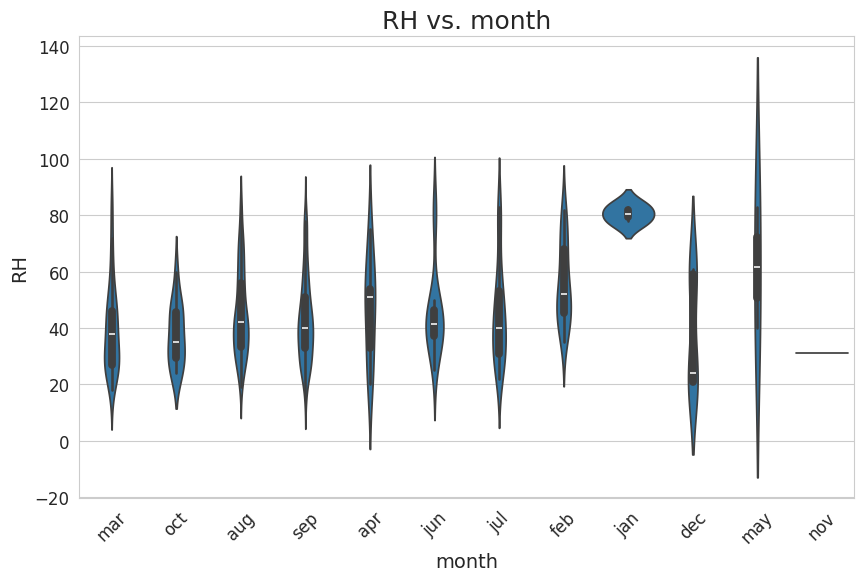

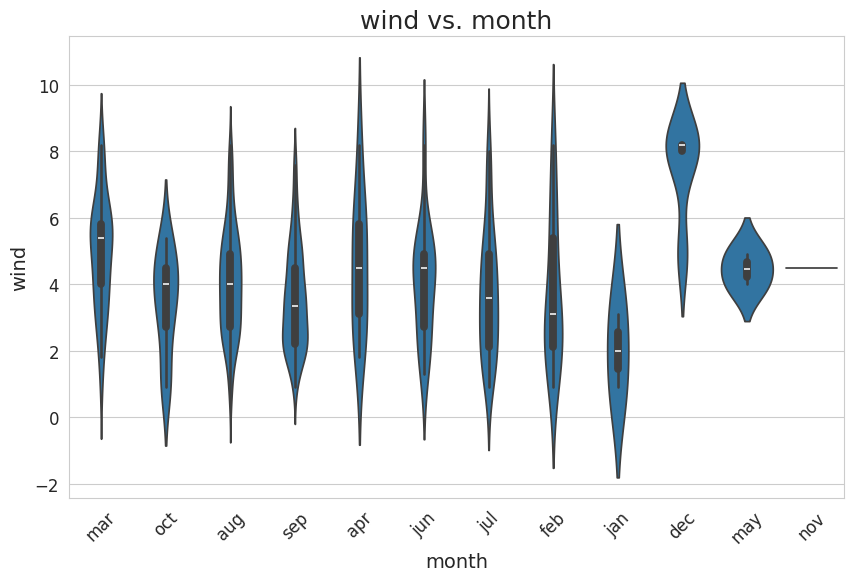

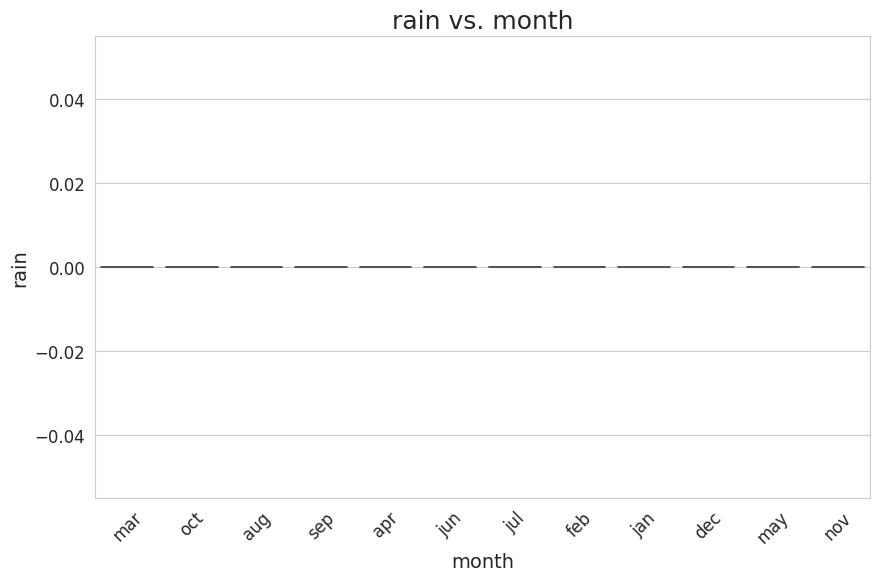

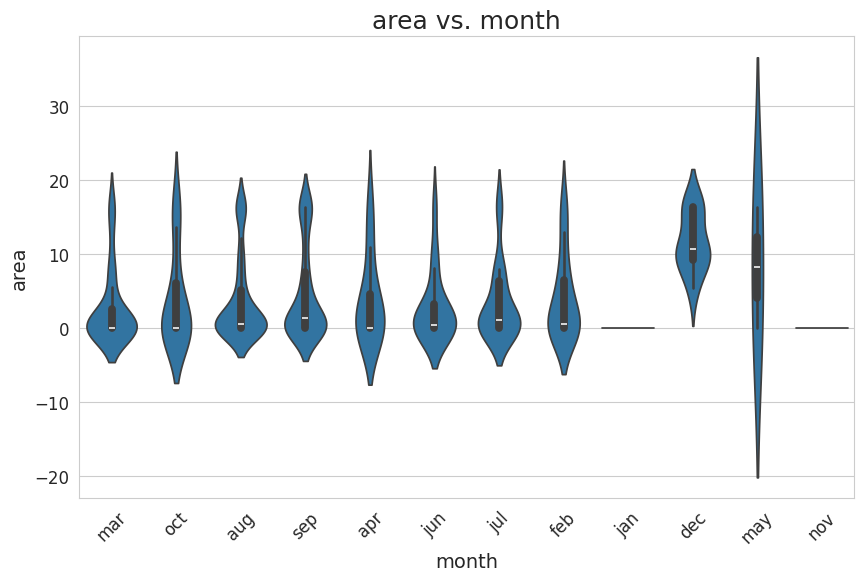

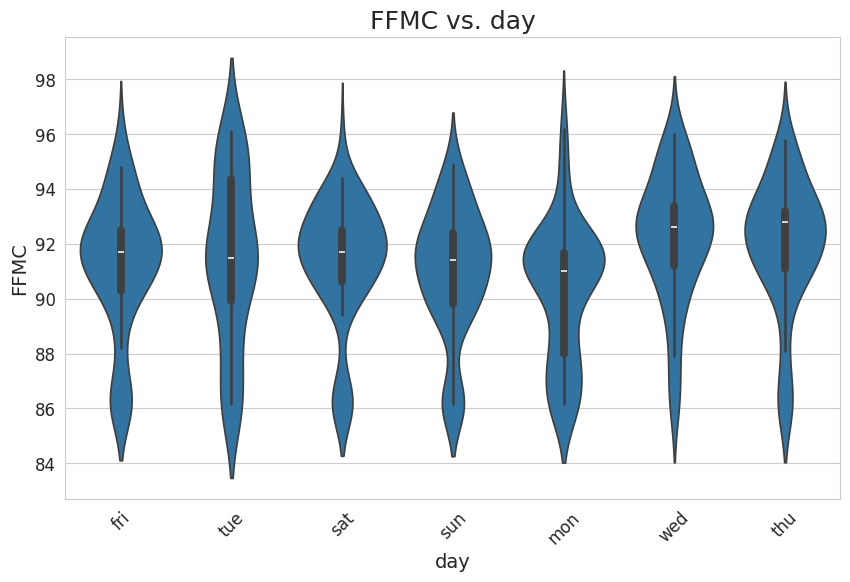

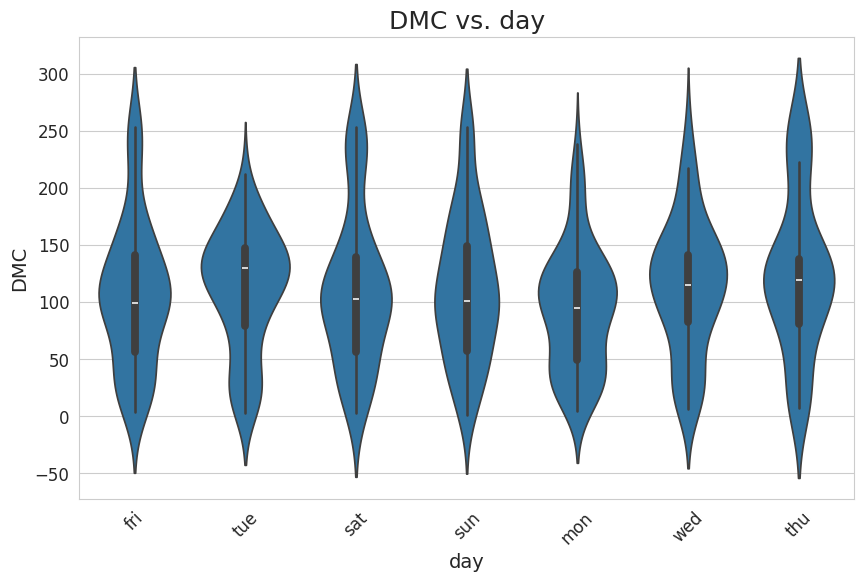

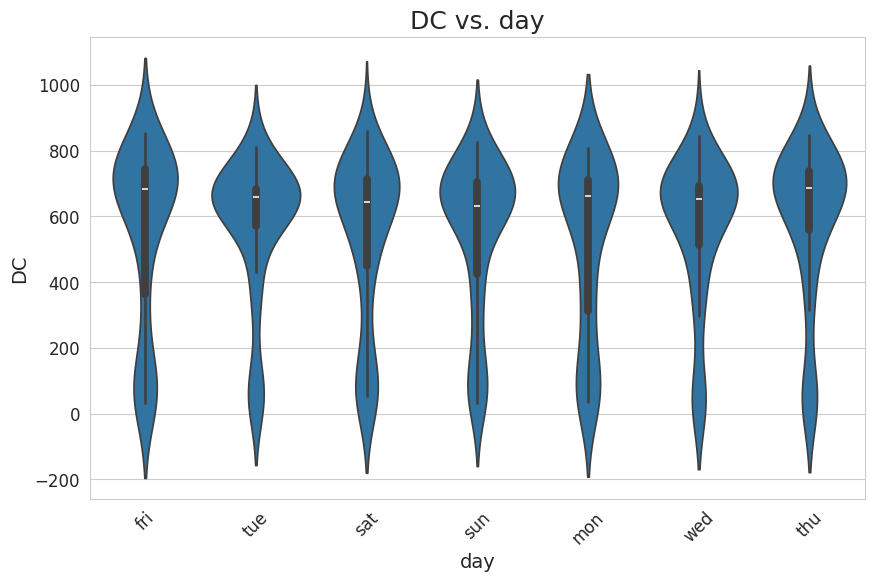

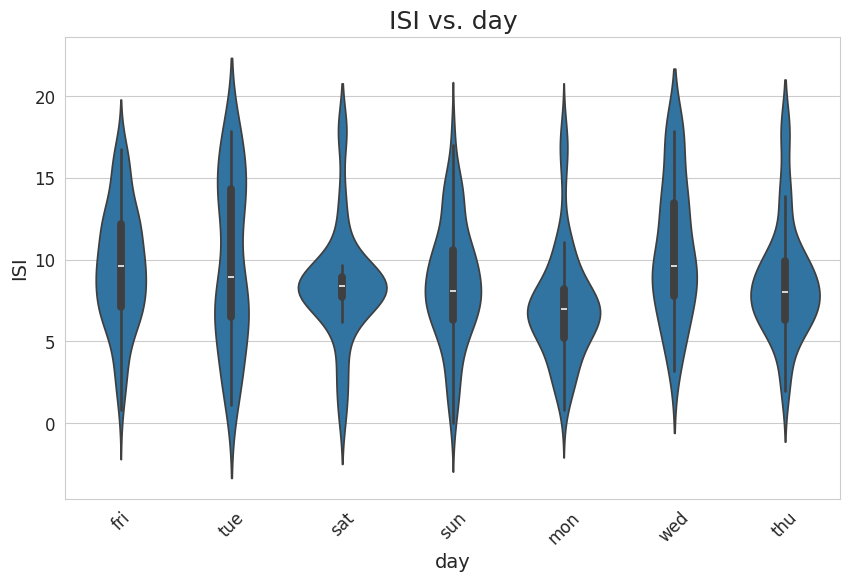

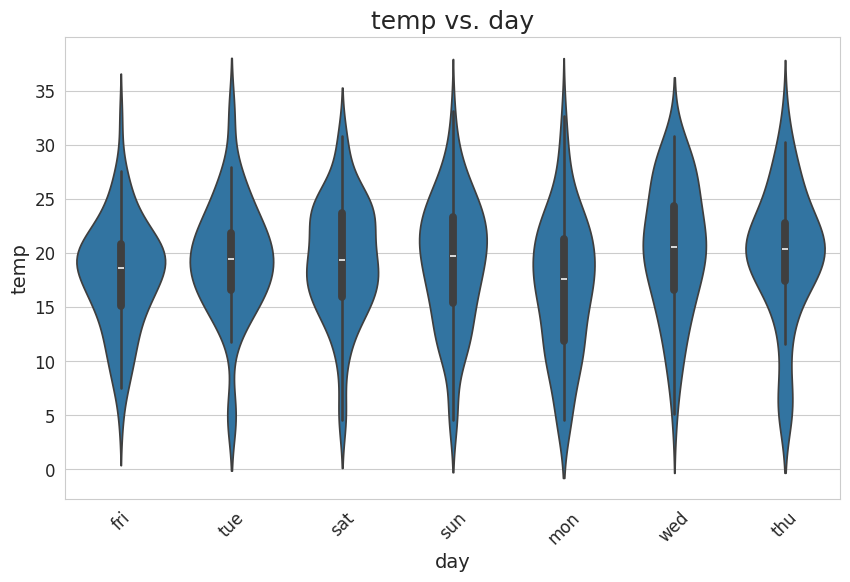

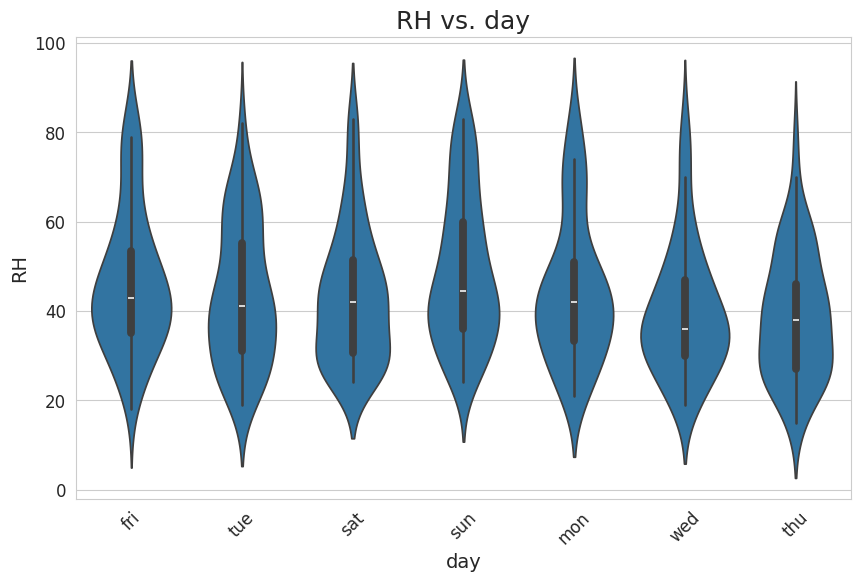

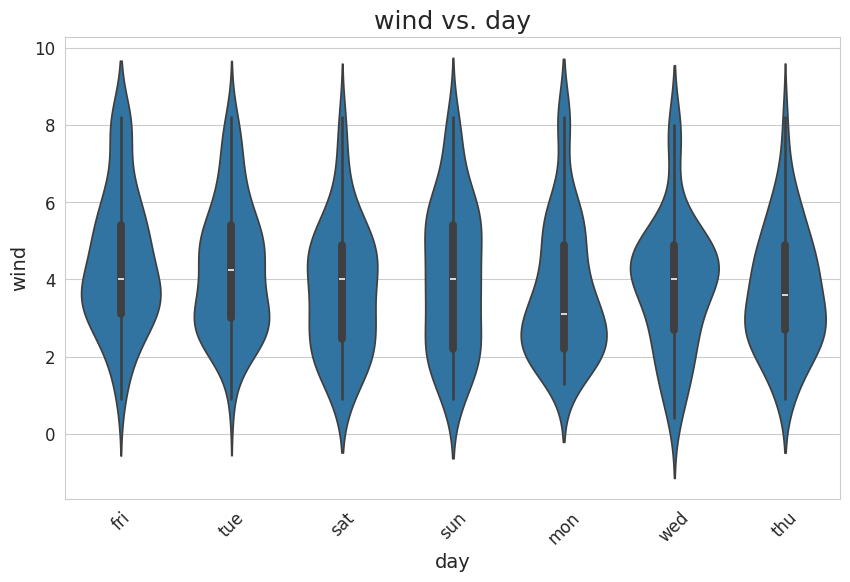

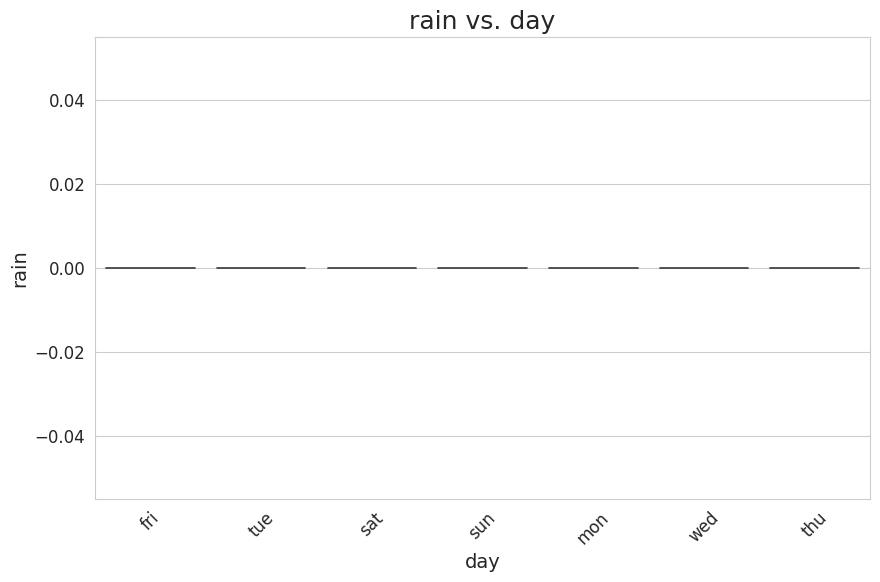

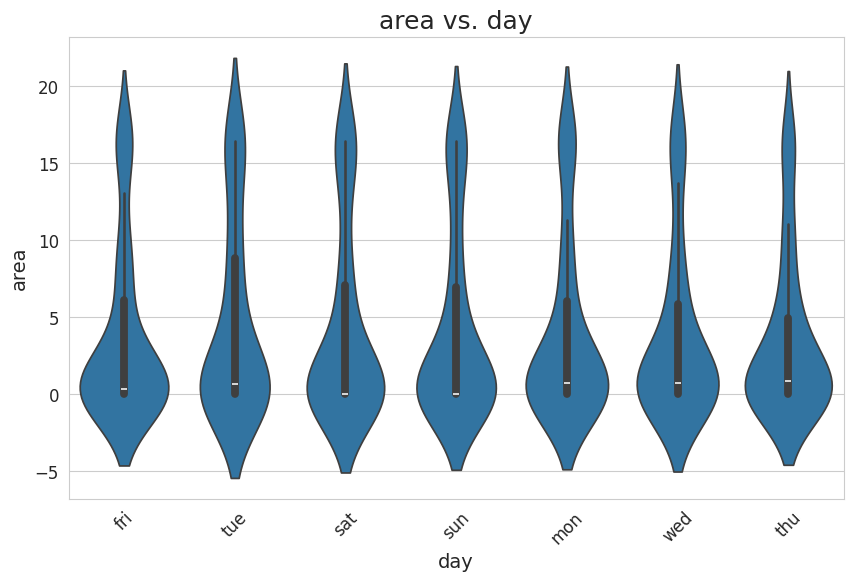

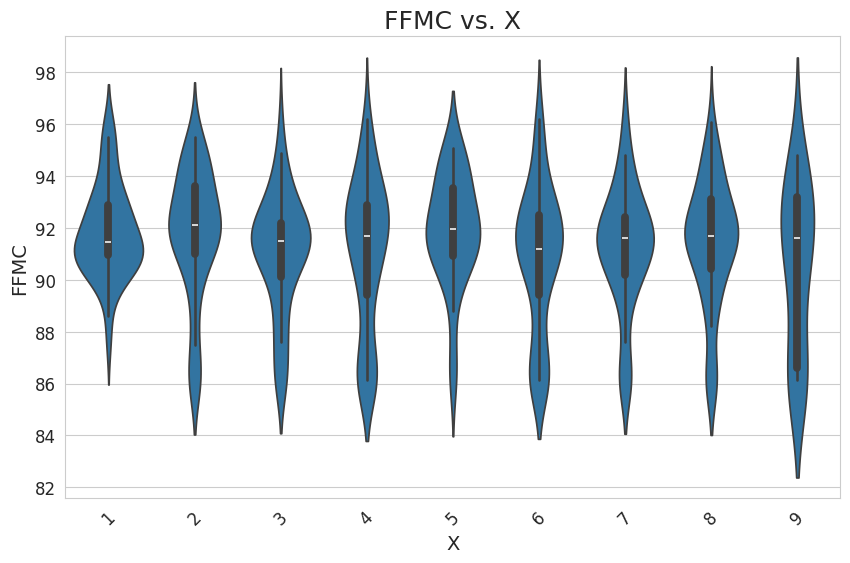

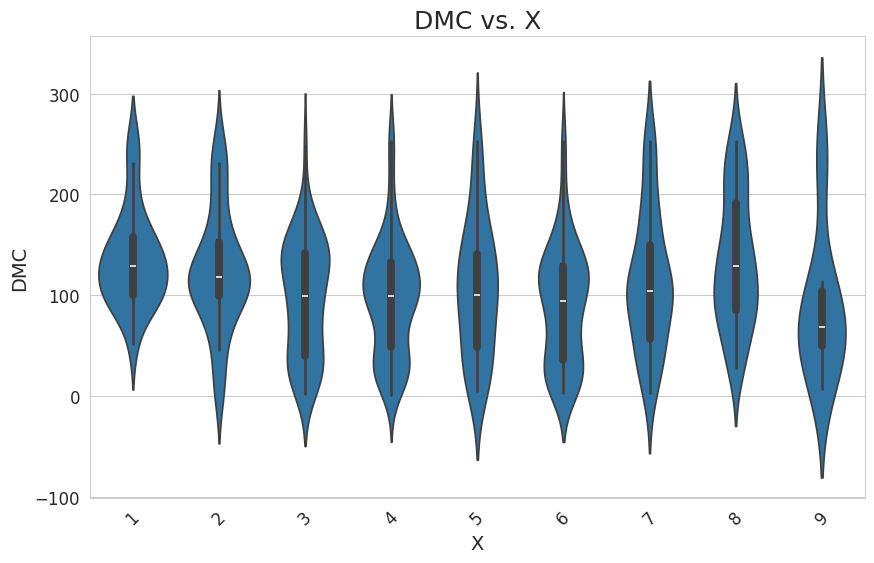

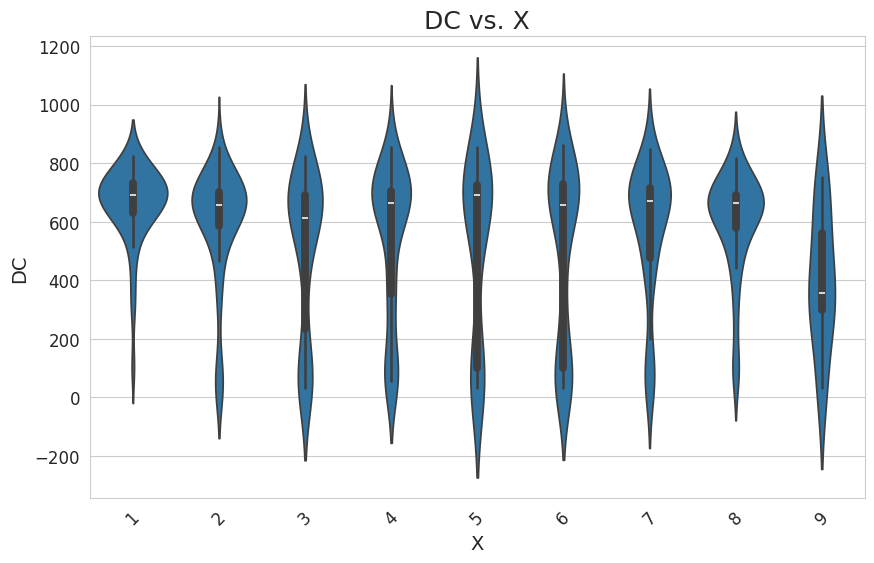

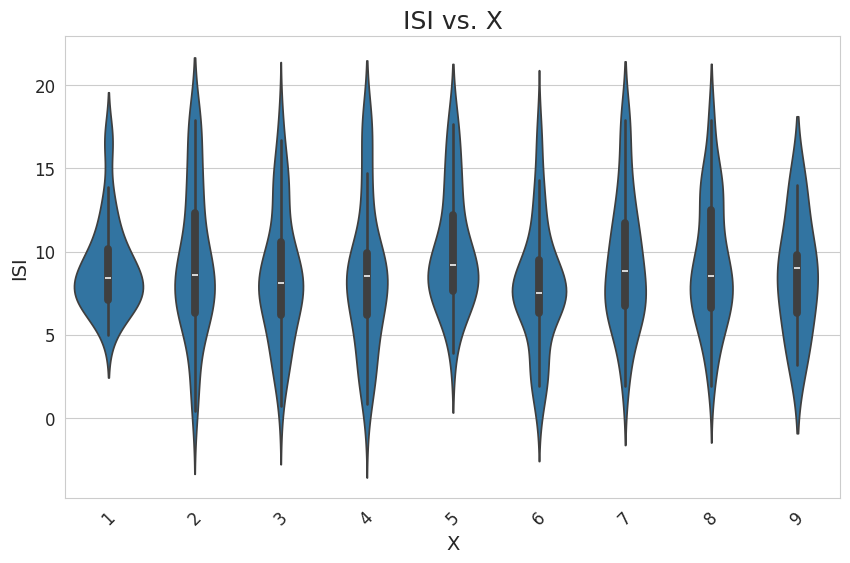

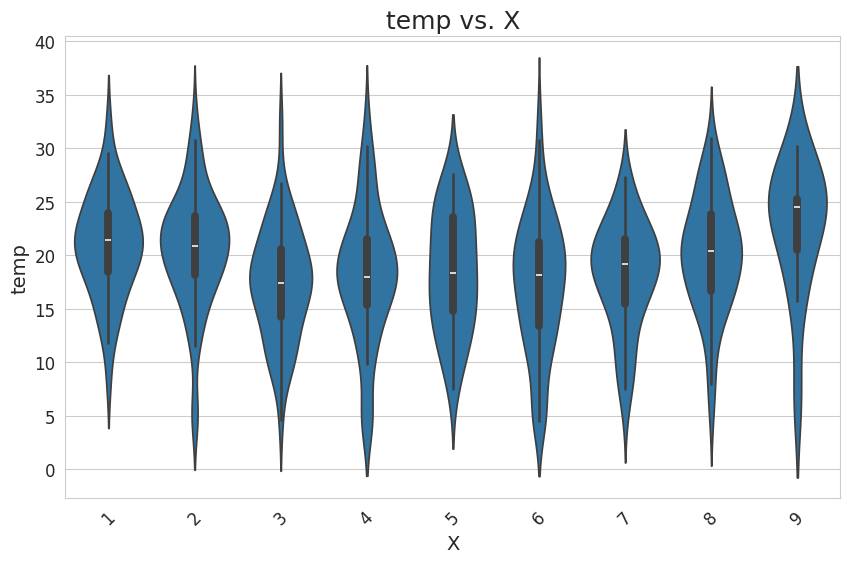

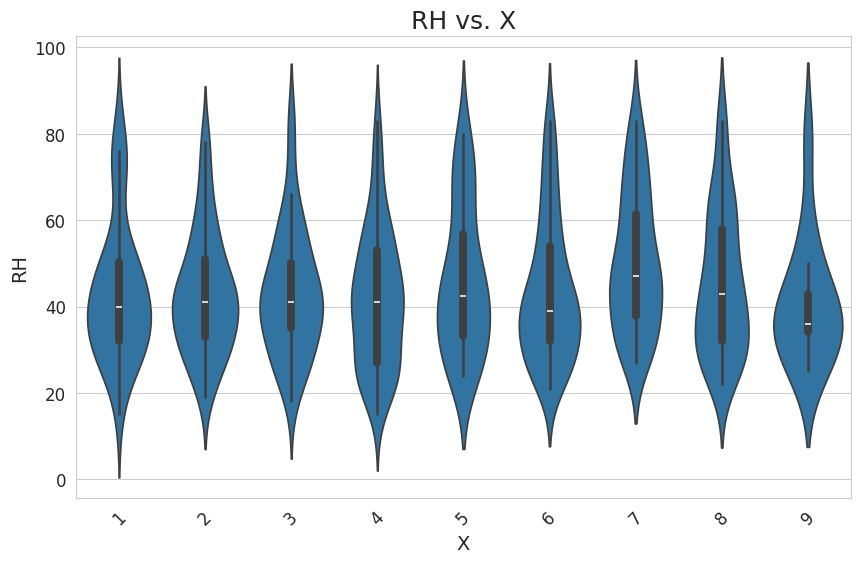

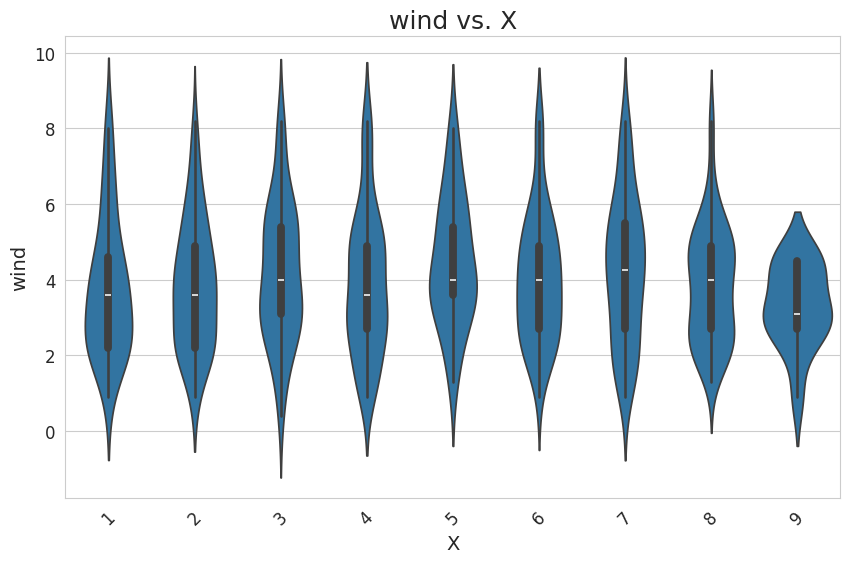

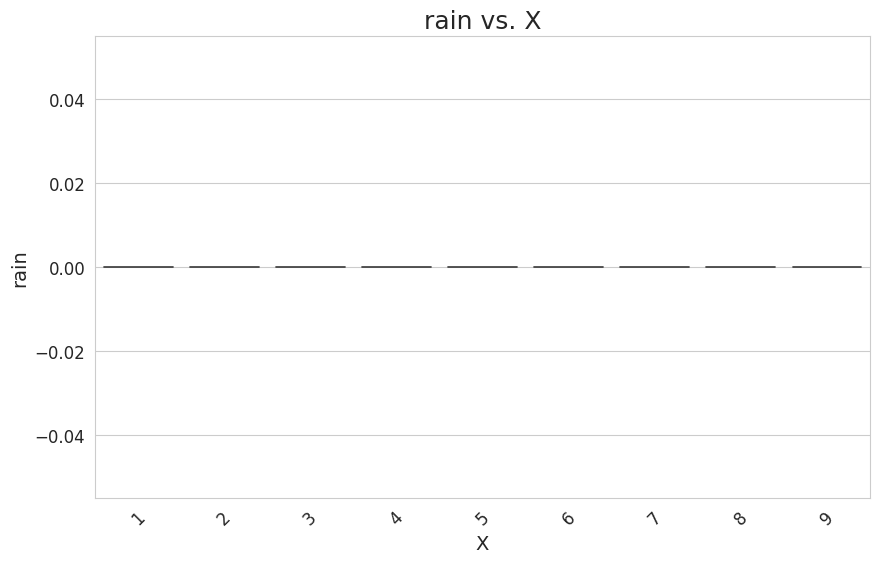

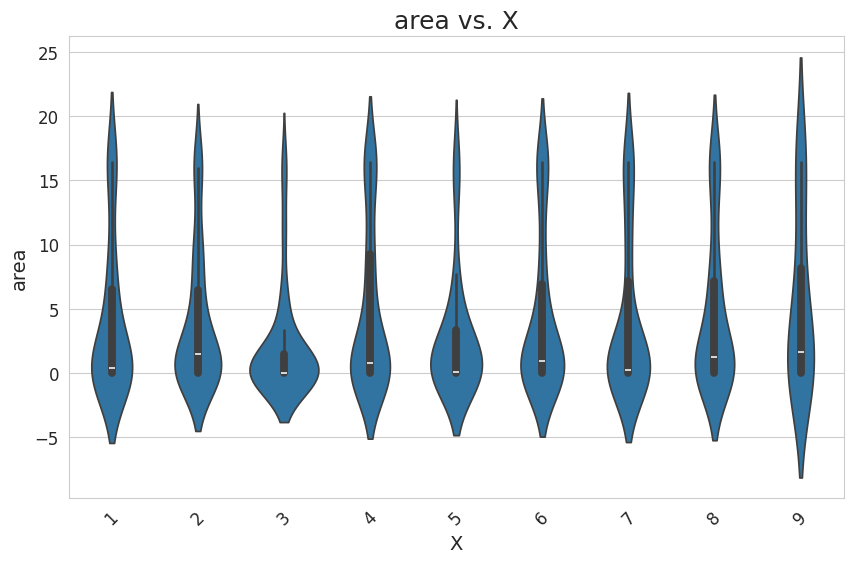

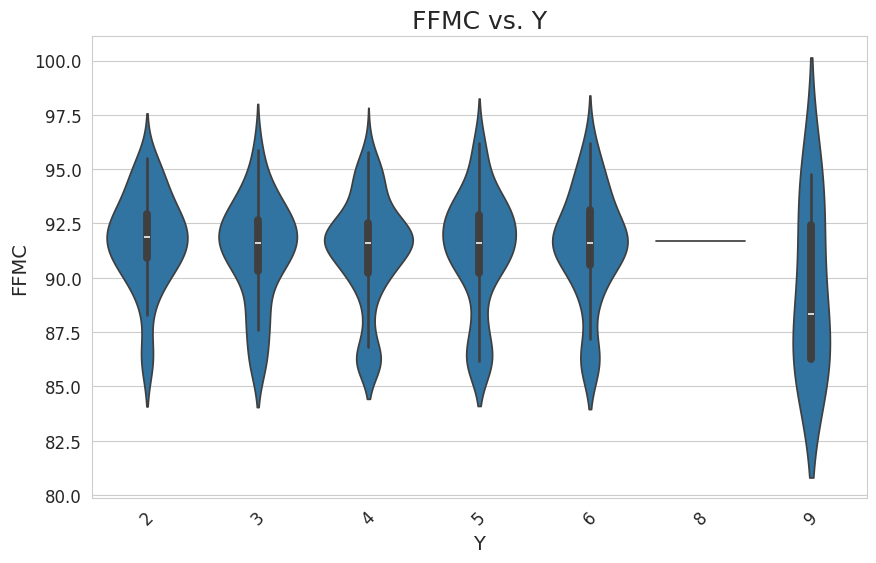

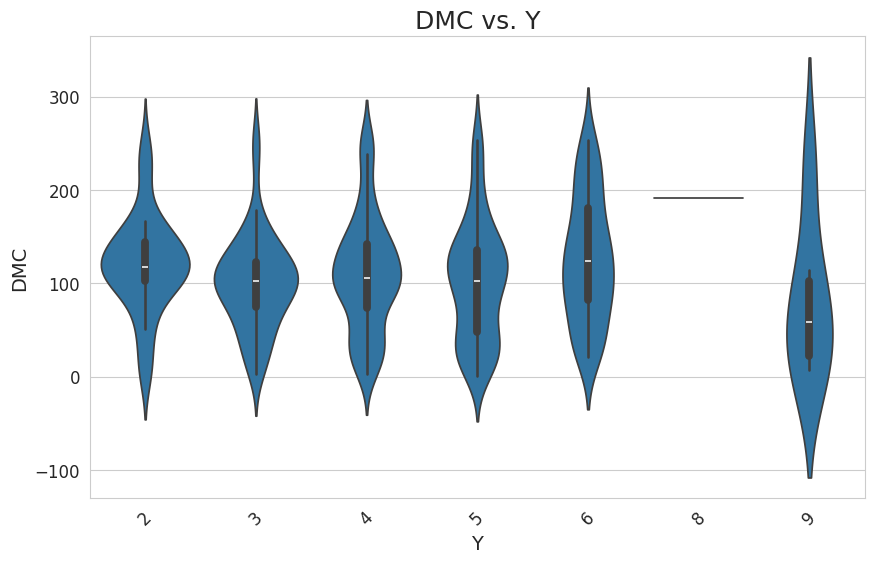

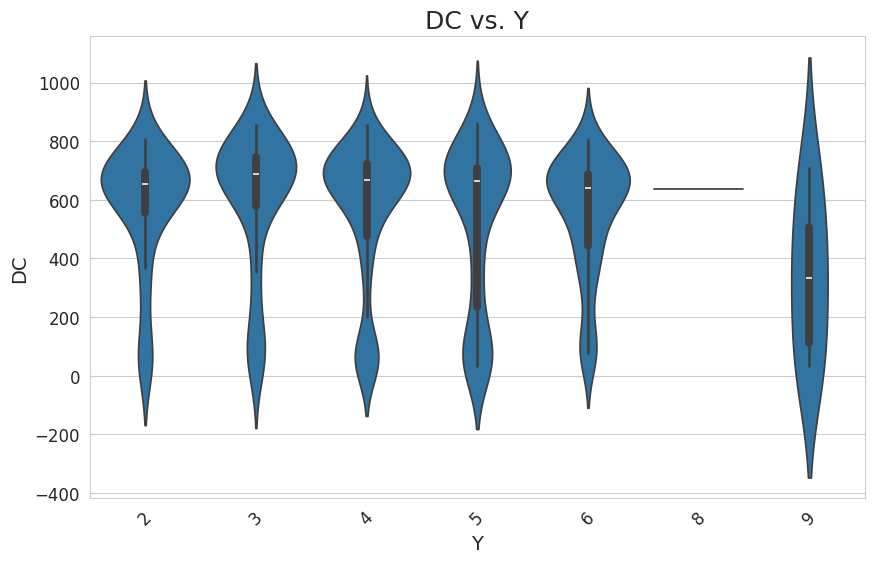

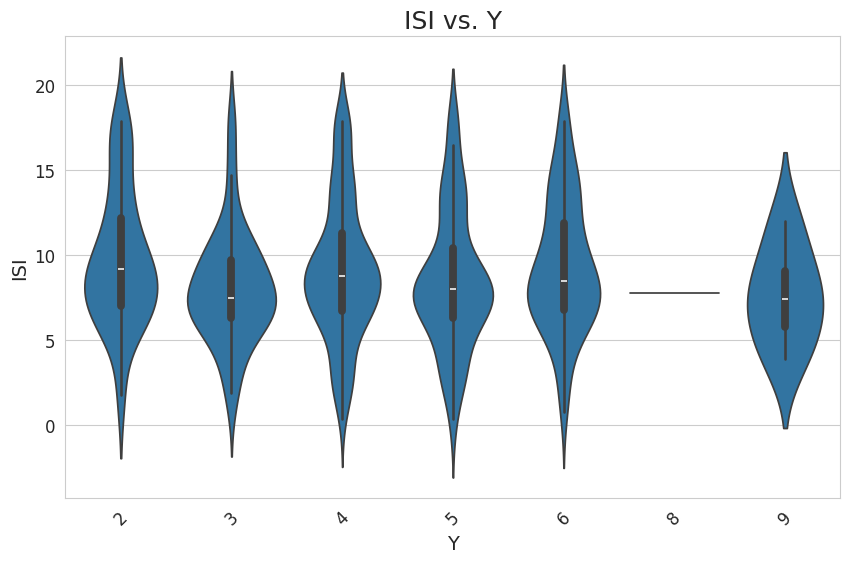

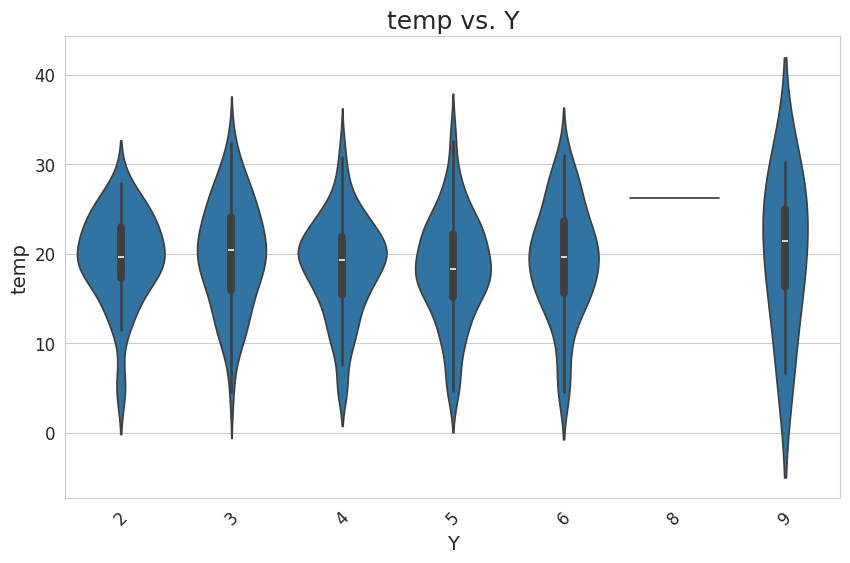

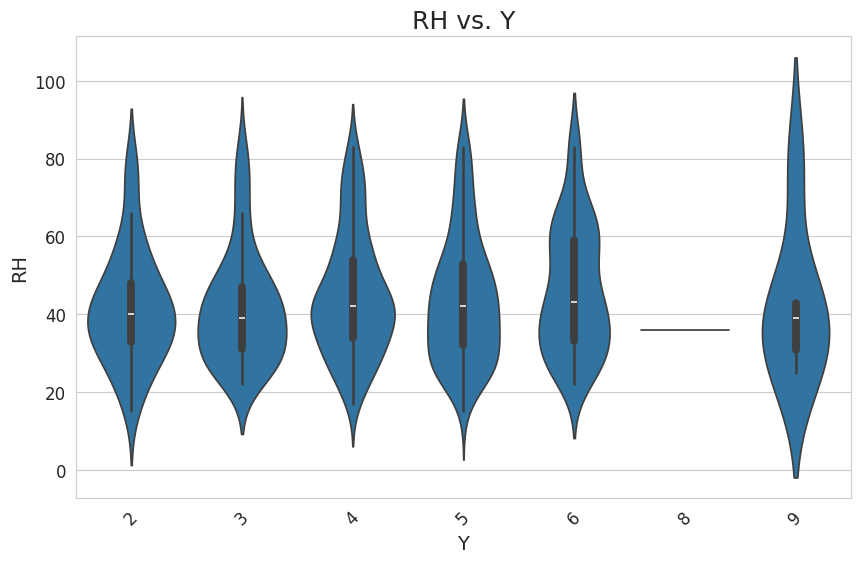

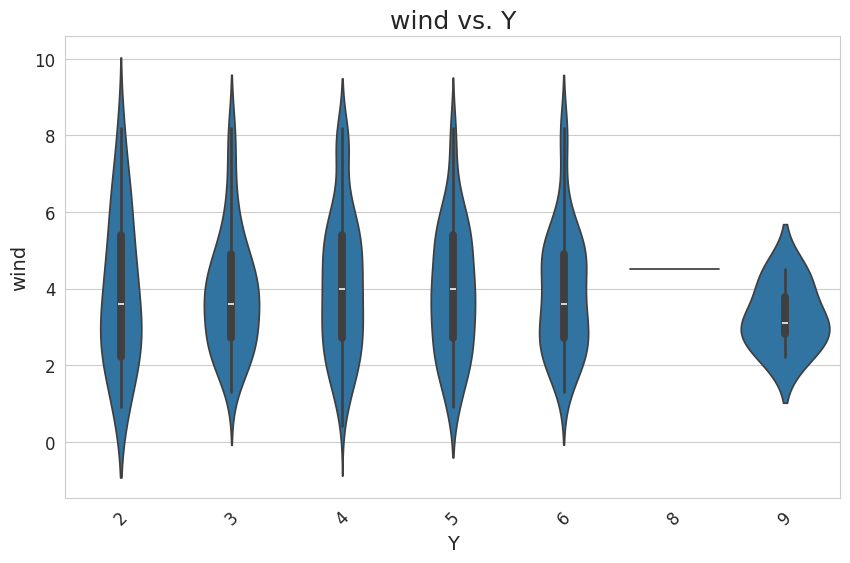

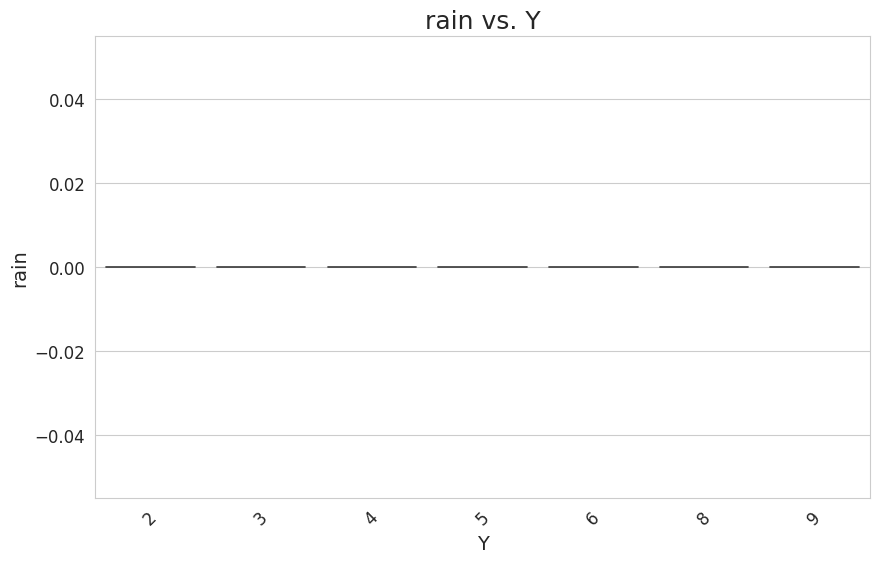

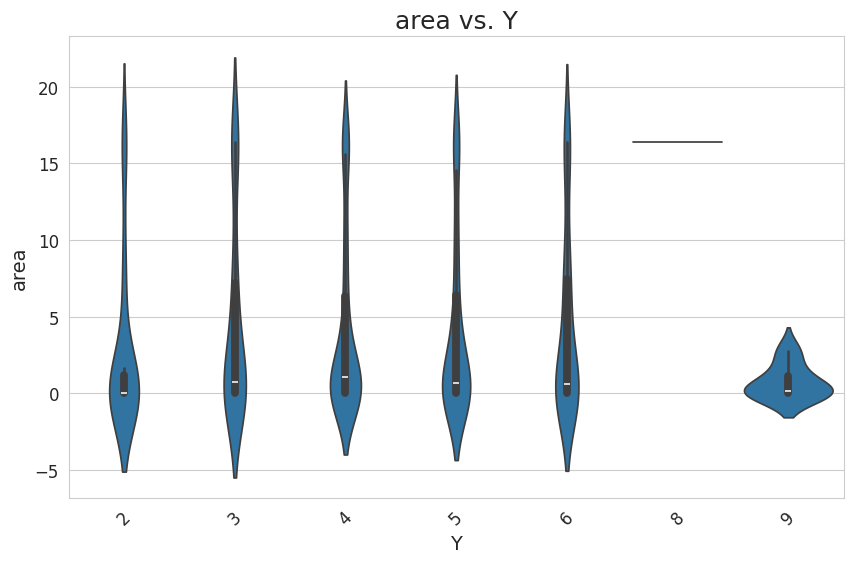

In [6]:
# Correlation matrix to identify relationships between numerical variables
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plots for continuous variable relationships
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plots of Numerical Variables', y=1.02)
plt.show()

# Bar plots to compare categorical and numerical variables
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col, y=num_col, data=df)
        plt.title(f'{num_col} vs. {col}')
        plt.xticks(rotation=45)
        plt.show()

# Violin plots to compare categorical and numerical variables
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=col, y=num_col, data=df)
        plt.title(f'{num_col} vs. {col}')
        plt.xticks(rotation=45)
        plt.show()

## Multivariate Analysis

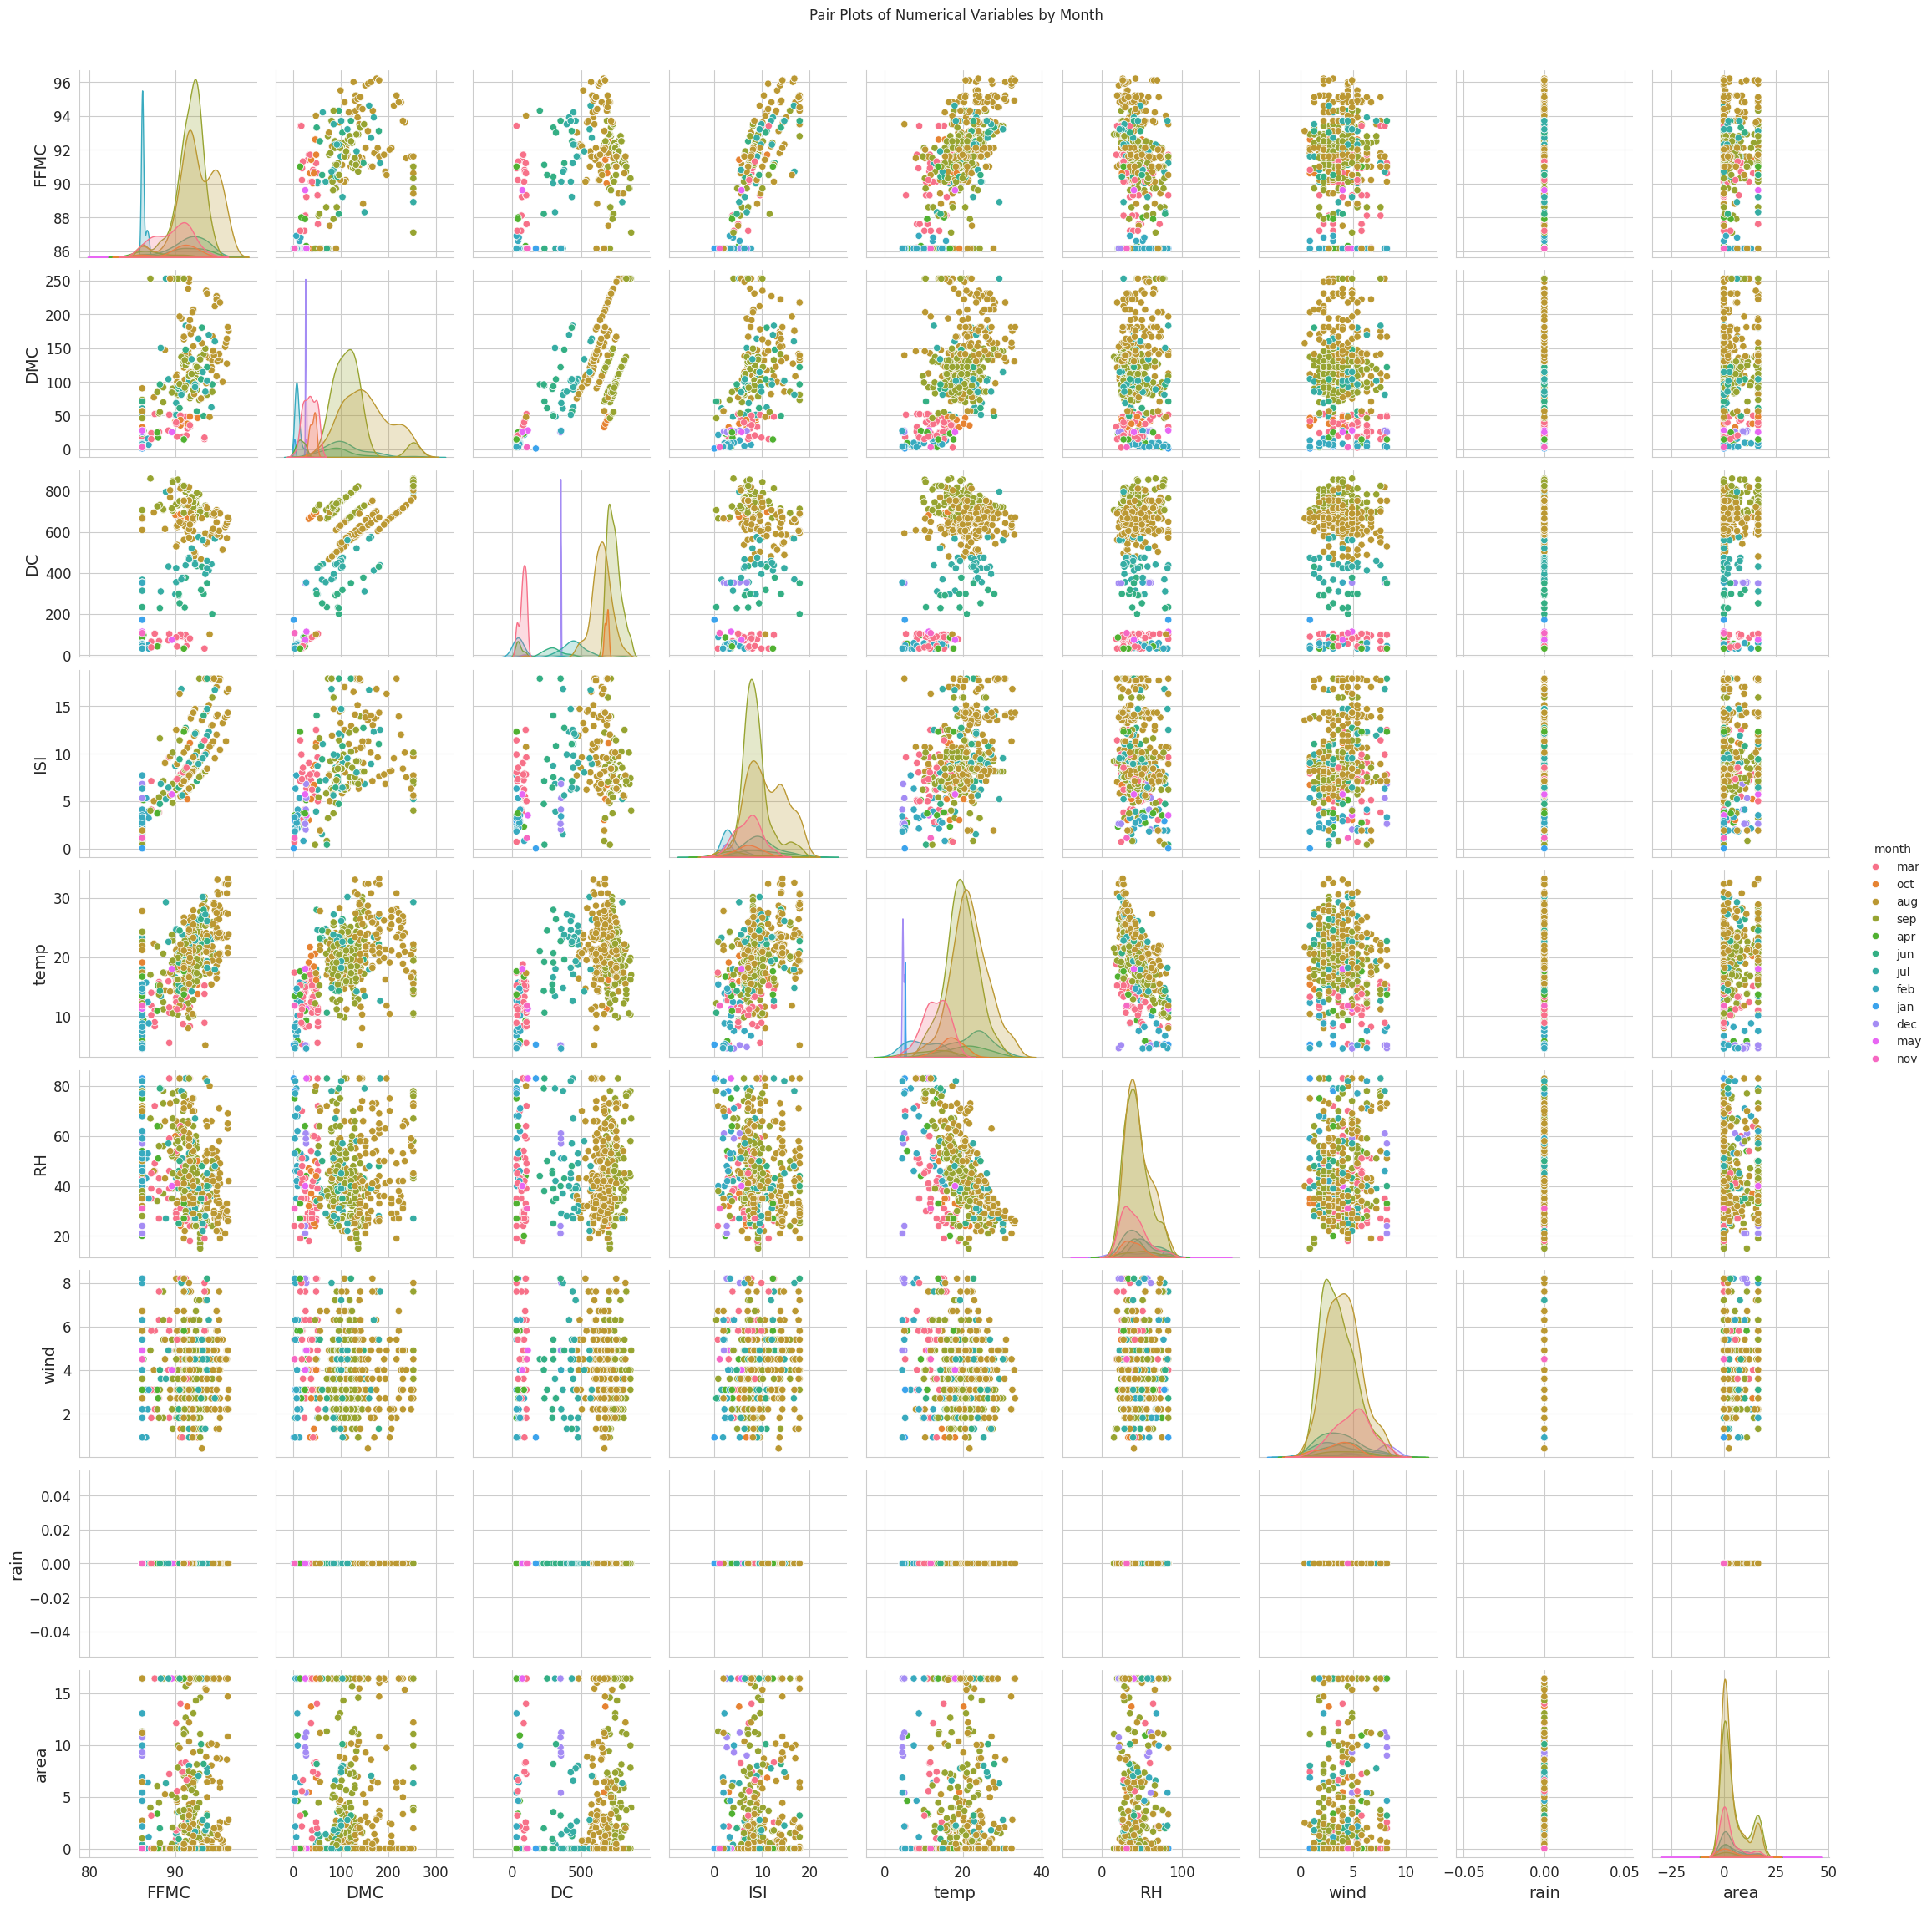

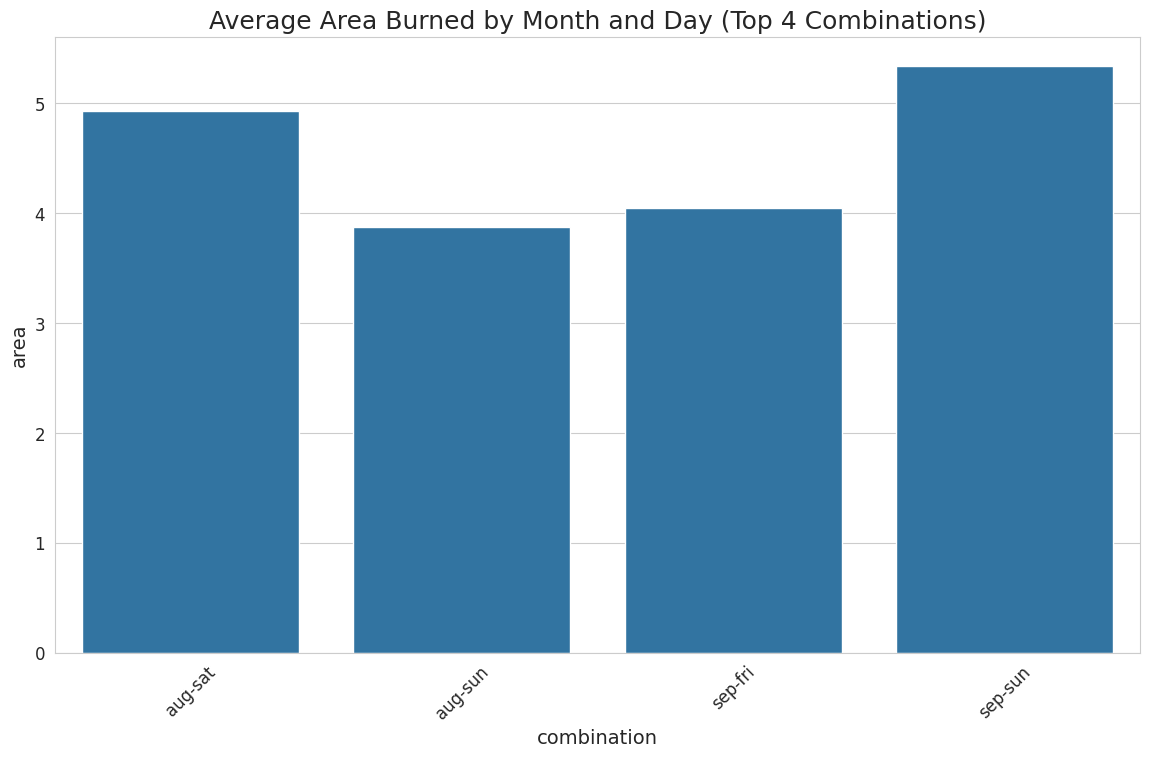

In [7]:
# Pair plots to analyze multiple relationships simultaneously
sns.pairplot(df, vars=numerical_cols, hue='month')
plt.suptitle('Pair Plots of Numerical Variables by Month', y=1.02)
plt.show()

# Grouped comparisons to identify combined effects of multiple features
# Average Area Burned by Month and Day
grouped_data = df.groupby(['month', 'day'])['area'].mean().reset_index()

# Select top 10 combinations for visualization
top_combinations = df.groupby(['month', 'day']).size().nlargest(10).index
grouped_data['combination'] = grouped_data['month'] + '-' + grouped_data['day']
grouped_data = grouped_data[grouped_data['combination'].isin(['aug-sun', 'aug-sat', 'sep-sun', 'sep-fri'])]

plt.figure(figsize=(14, 8))
sns.barplot(x='combination', y='area', data=grouped_data)
plt.title('Average Area Burned by Month and Day (Top 4 Combinations)')
plt.xticks(rotation=45)
plt.show()